# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

# Reading and handling the data
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical computations

#Vvisualizinng and analyzing it
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization

#data preprocessing and training
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets

import warnings
warnings.filterwarnings('ignore')  # To ignore warning messages during execution


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r'C:\Users\divya\Downloads\30688323-a1ea-4809-83c4-91d8096236c8-Delivery-Starter\Delivery_Starter\porter_data_1.csv')  # Load the dataset from a CSV file

In [3]:
df.shape  # Get the dimensions of the DataFrame (rows, columns)

(175777, 14)

In [4]:
df.info()  # Display summary info including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [6]:
df.head()  # Display the first few rows of the dataset

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

In [7]:
df.describe()  # Generate descriptive statistics

market_id                     created_at  \
count  175777.000000                         175777   
mean        2.743726  2015-02-04 19:57:50.009631744   
min         1.000000            2015-01-21 15:22:03   
25%         2.000000            2015-01-29 01:31:19   
50%         2.000000            2015-02-05 02:41:26   
75%         4.000000            2015-02-12 01:04:32   
max         6.000000            2015-02-18 06:00:44   
std         1.330963                            NaN   

                actual_delivery_time  store_primary_category  order_protocol  \
count                         175777           175777.000000   175777.000000   
mean   2015-02-04 20:44:02.190406144               35.887949        2.911752   
min              2015-01-21 16:07:03                0.000000        1.000000   
25%              2015-01-29 02:16:30               18.000000        1.000000   
50%              2015-02-05 03:34:33               38.000000        3.000000   
75%              2015-02-12 01:48:24               55.000000        4.000000   
max              2015-02-18 06:51:10               72.000000        7.000000   
std                              NaN               20.728254        1.513128   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders       distance  
count             175777.000000  175777.000000  
mean                  58.230115      21.843090  
min                   -6.000000       0.000000  
25%                   17.000000      15.360000  
50%                   41.000000      21.760000  
75%                   85.000000      28.120000  
max                  285.000000      83.520000  
std                   52.731043       8.748712

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [8]:
# Convert categorical features to category type
categorical_columns = ['market_id','store_primary_category','order_protocol']

for col in categorical_columns:
    df[col]=df[col].astype('category')

In [9]:
print(df.dtypes)

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [10]:
# Calculate time taken in minutes
df['time_taken_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Verify the new column
print(df[['created_at', 'actual_delivery_time', 'time_taken_minutes']].head())

           created_at actual_delivery_time  time_taken_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                46.0


In [11]:
df.head()  # Display the first few rows of the dataset

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_minutes  
0                      21.0     34.44                47.0  
1                       2.0     27.60                44.0  
2                      18.0     11.56                55.0  
3                       8.0     31.80                59.0  
4                       7.0      8.20                46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [12]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend';
# if weekend its populated with 1 indicating yes, else 0 indicating no
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x>=5 else 0)


In [13]:
df.head()  # Display the first few rows of the dataset

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_minutes  order_hour  \
0                      21.0     34.44                47.0          22   
1                       2.0     27.60                44.0          21   
2                      18.0     11.56                55.0           0   
3                       8.0     31.80                59.0           3   
4                       7.0      8.20                46.0           2   

   order_day_of_week  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

As time_taken_mins, order_hour, order_day_of_week and isWeekend variables are derived, hence dropping created_at and actual_delivery_time 

In [14]:
# Drop unnecessary columns
df.drop(['created_at','actual_delivery_time'], axis=1, inplace=True)
df.drop(['store_primary_category'], axis=1, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [15]:
# Define target variable (y) and features (X)

#Copying the target variable to y and removing it from df; Also assoigning the remaining variables to X
y = df['time_taken_minutes']
X = df.drop(columns=['time_taken_minutes'])


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)  # To split the dataset into training and test sets

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140621, 14), (35156, 14), (140621,), (35156,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [18]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = ['market_id', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']

numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

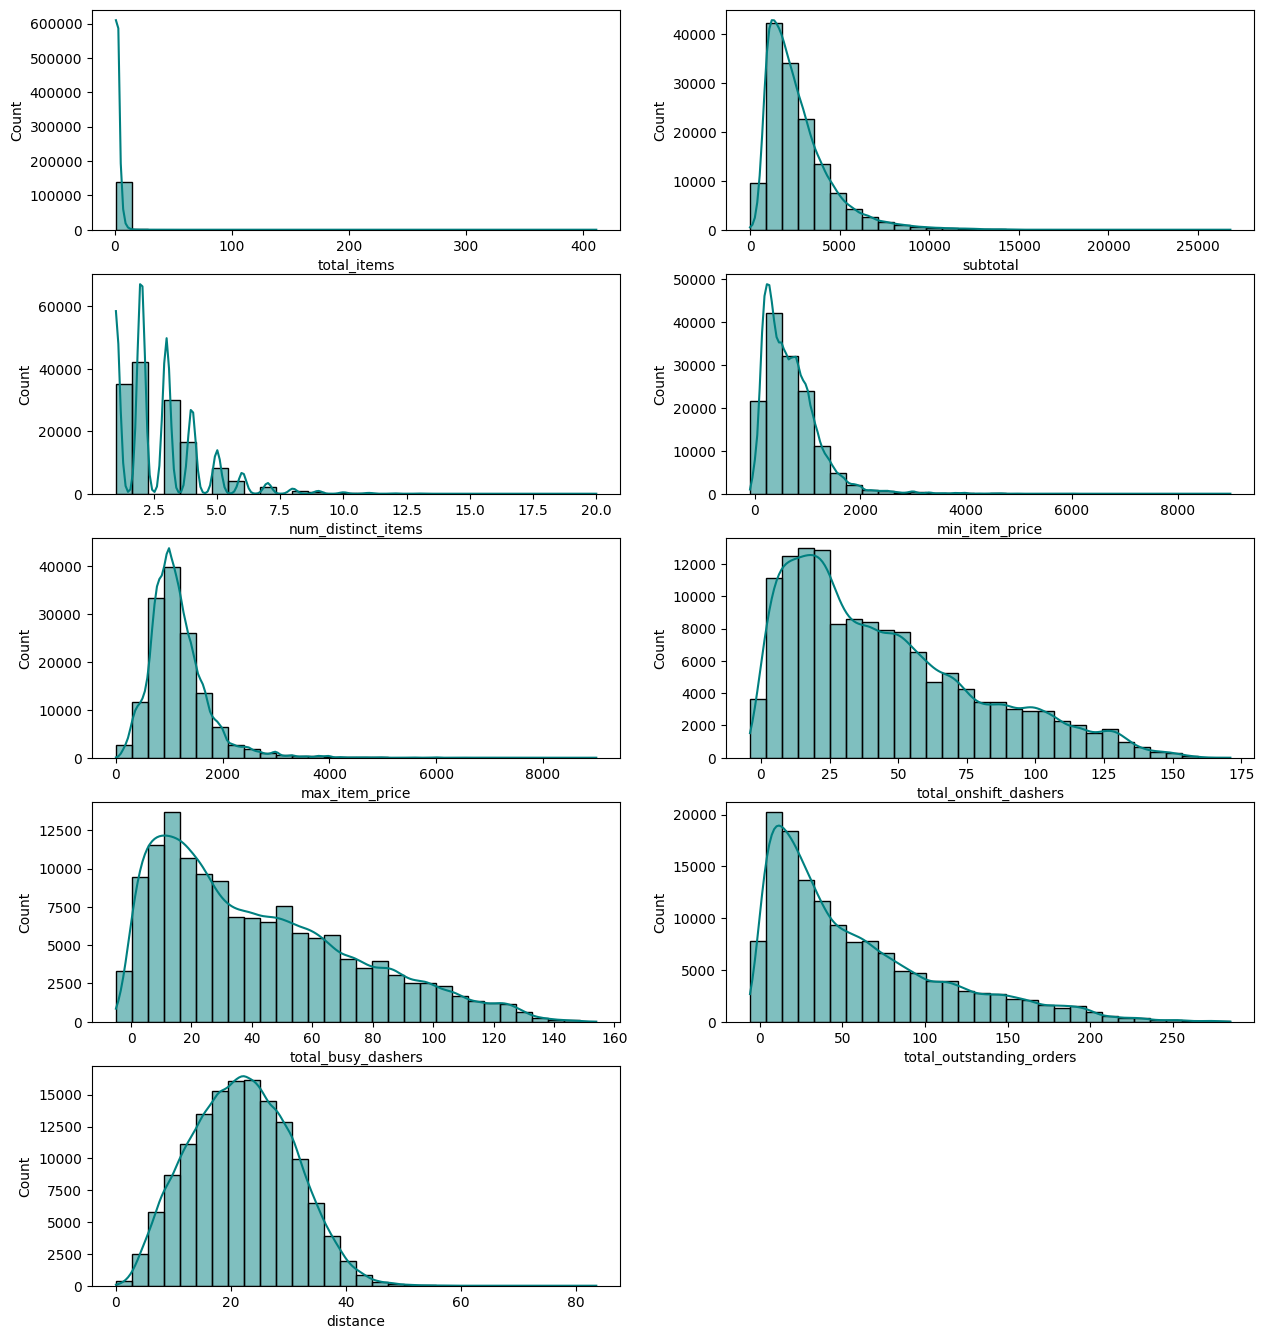

In [19]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in numerical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.histplot(X_train[var], bins=30, kde=True , color = 'teal')  # Seaborn plotting function
    i += 1
plt.show()  # Matplotlib plotting function

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

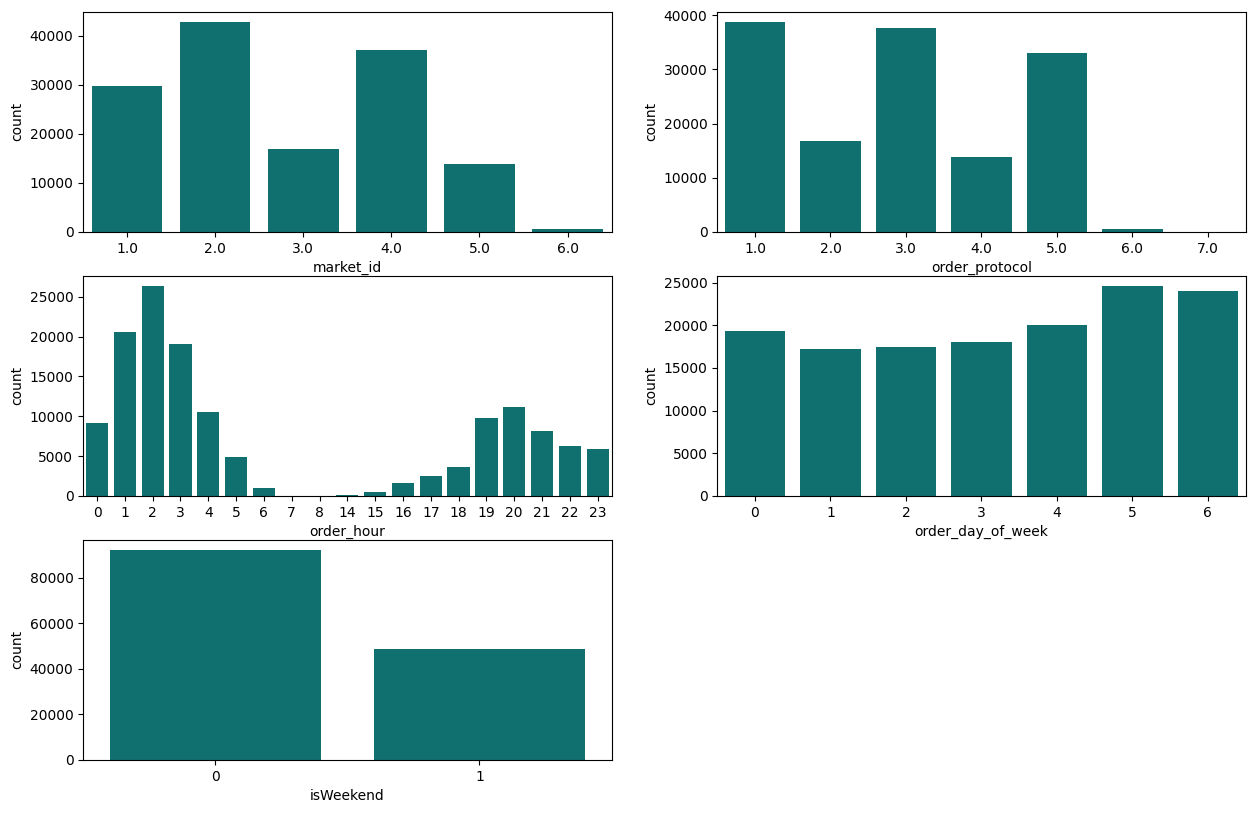

In [20]:
# Distribution of categorical columns

plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in categorical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.countplot(data=X_train, x=var, color = 'teal')  # Seaborn plotting function
    i += 1
plt.show()  # Matplotlib plotting function

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='time_taken_minutes', ylabel='Count'>

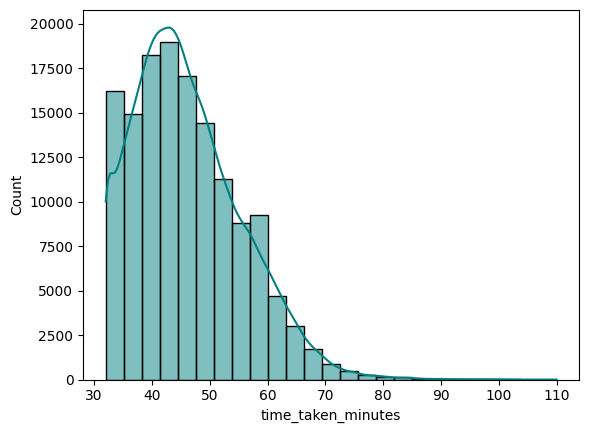

In [21]:
# Distribution of time_taken

sns.histplot(y_train, bins=25, kde=True,color = 'teal')  # Seaborn plotting function

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

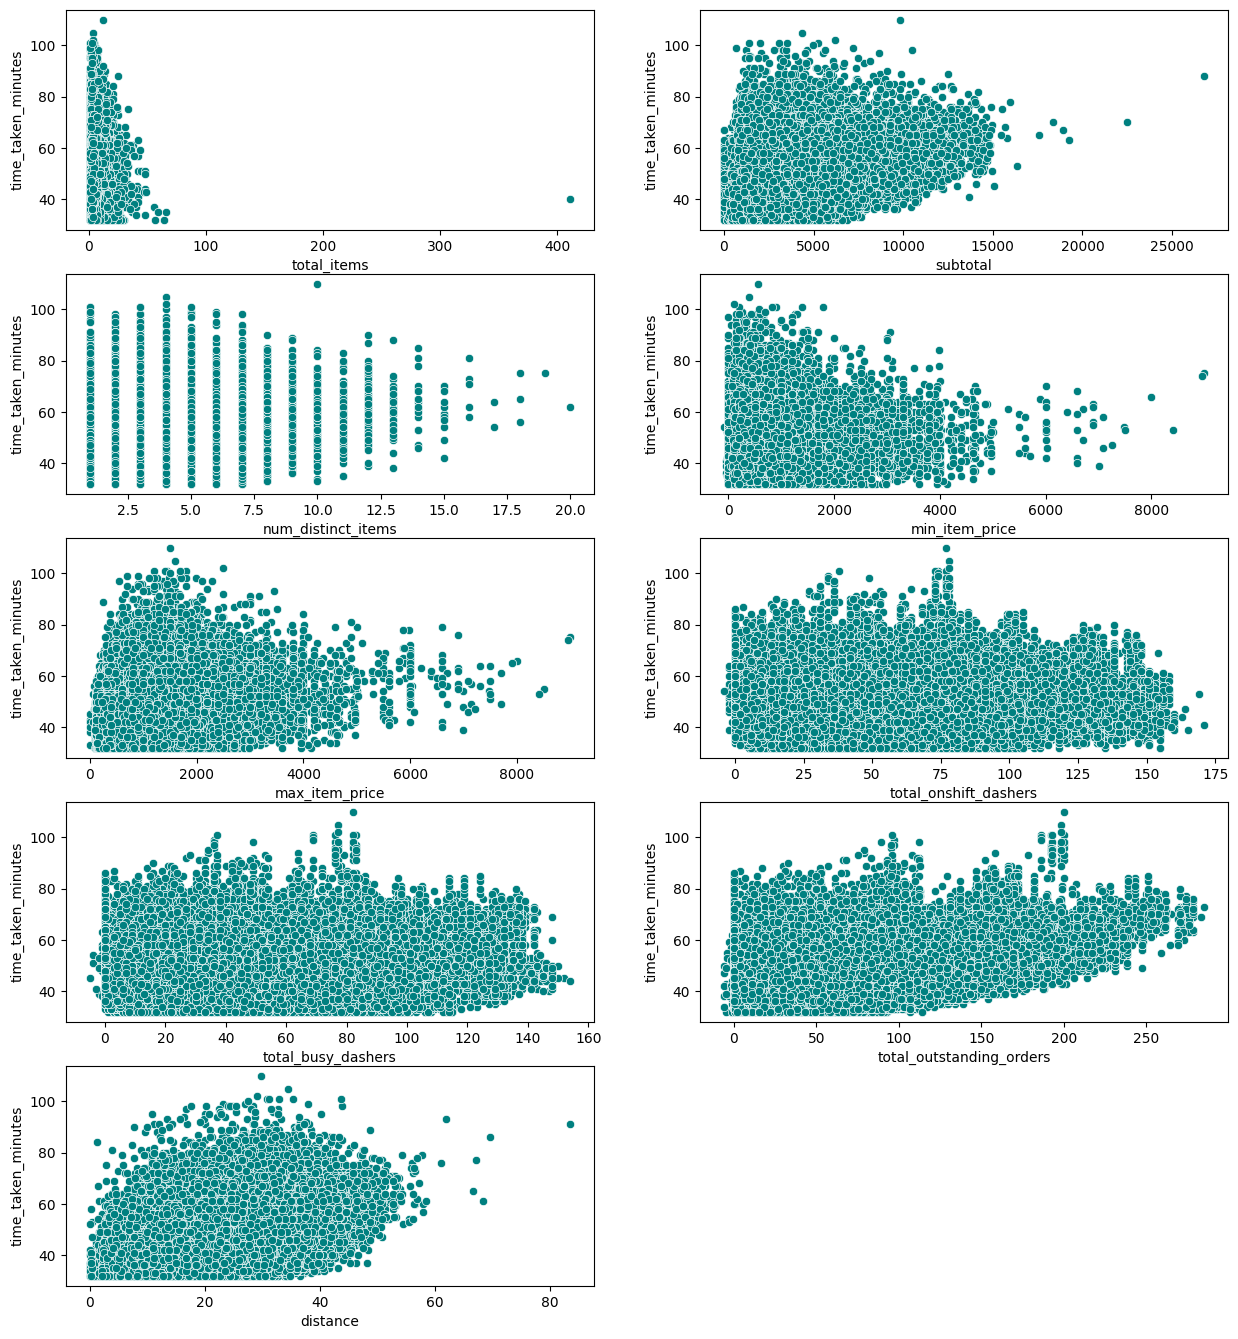

In [22]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in numerical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.scatterplot(x=X_train[var], y=y_train, color = 'teal')  # Seaborn plotting function
    i += 1
plt.show()  # Matplotlib plotting function

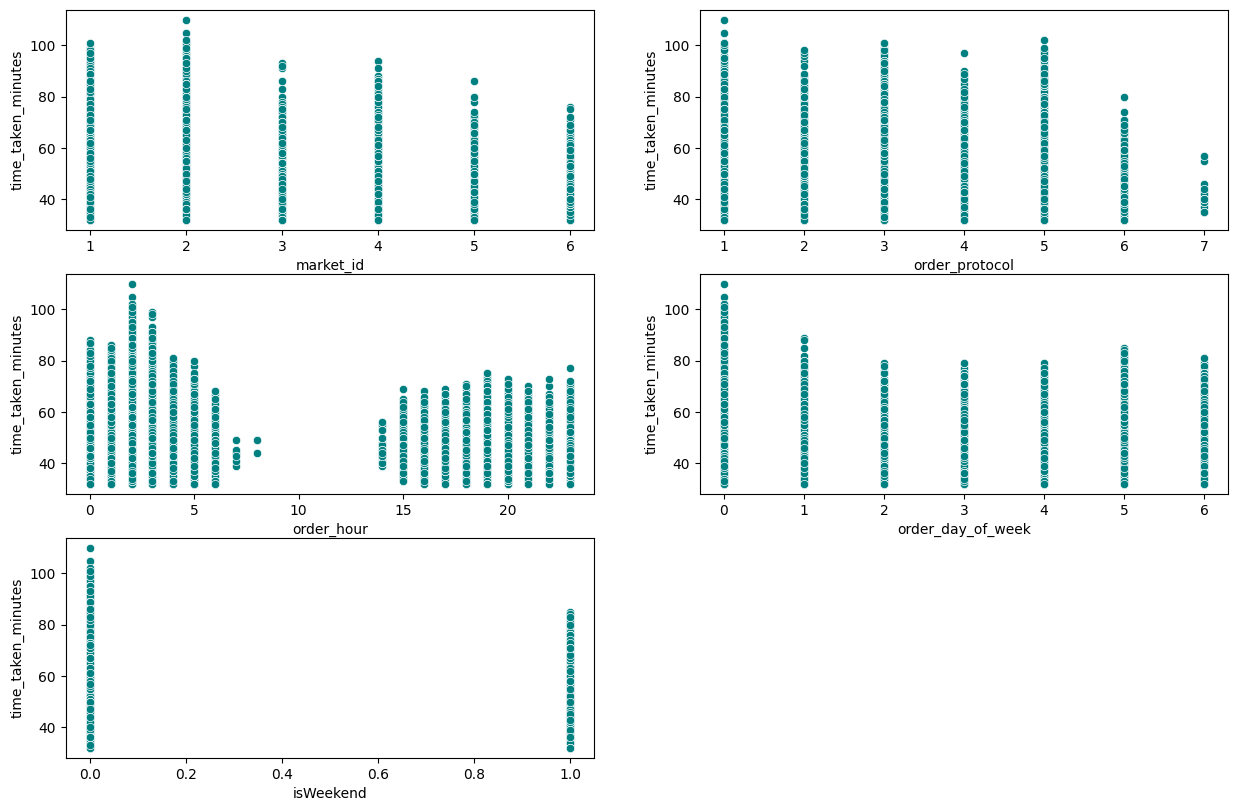

In [23]:
# Scatter plot to visualise the relationship between time_taken and categorical features
plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in categorical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.scatterplot(x=X_train[var], y=y_train, color = 'teal')  # Seaborn plotting function
    i += 1
plt.show()  # Matplotlib plotting function

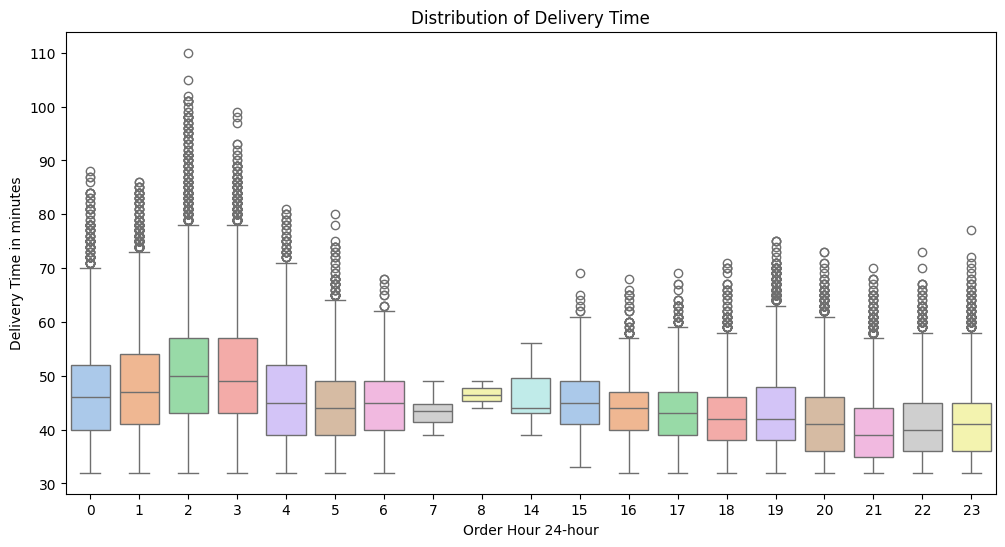

In [24]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))  # Matplotlib plotting function

# Create a boxplot to show the time_taken for different hours
sns.boxplot(x=X_train['order_hour'], y=y_train, palette="pastel")  # Seaborn plotting function

# Set labels and title
plt.xlabel("Order Hour 24-hour")  # Matplotlib plotting function
plt.ylabel("Delivery Time in minutes")  # Matplotlib plotting function
plt.title("Distribution of Delivery Time")  # Matplotlib plotting function

plt.show()  # Matplotlib plotting function


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

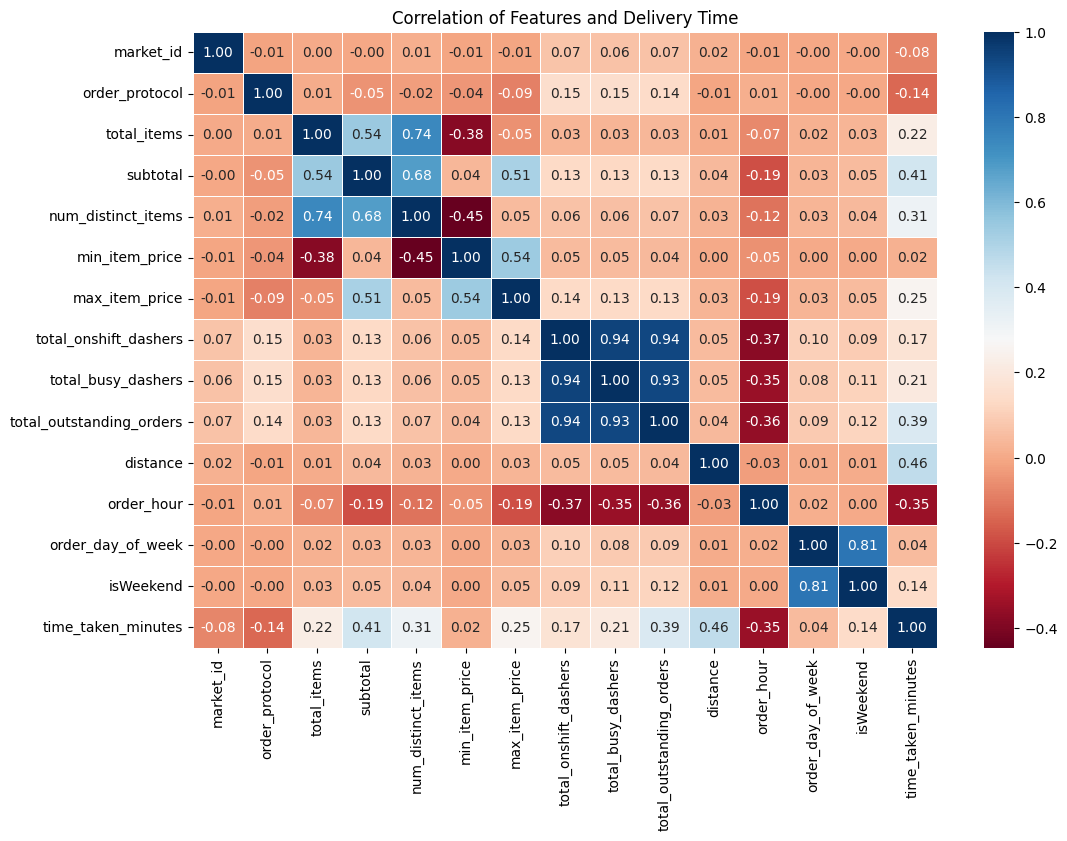

In [25]:
# Plot the heatmap of the correlation matrix

train_corr = X_train.copy()
train_corr['time_taken_minutes'] = y_train

# Compute correlation matrix
corr_matrix = train_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Matplotlib plotting function
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)  # Seaborn plotting function

# Set title
plt.title("Correlation of Features and Delivery Time")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [26]:
# Drop 3-5 weakly correlated columns from training dataset

# Set a correlation threshold
threshold = 0.1

# Find features with weak correlation (absolute value < threshold)
weak_features = corr_matrix['time_taken_minutes'][abs(corr_matrix['time_taken_minutes']) < threshold].index


print(f"Dropping features due to weak correlation: {list(weak_features)}")

# Drop weak features from X_train and X_test
X_train_filter = X_train.drop(columns=weak_features)


Dropping features due to weak correlation: ['market_id', 'min_item_price', 'order_day_of_week']


In [27]:
X_train_filter

order_protocol  total_items  subtotal  num_distinct_items  \
102712            2.0            1       820                   1   
94576             3.0            1       995                   1   
49784             3.0            4      2040                   4   
37753             1.0            2      2376                   2   
91728             1.0            1      1430                   1   
...               ...          ...       ...                 ...   
119879            5.0            1      1111                   1   
103694            1.0            4      2880                   3   
131932            5.0            2      1799                   2   
146867            2.0           10      4015                   4   
121958            3.0            4      4951                   4   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712             745                   35.0                39.0   
94576              995                  110.0                72.0   
49784              895                    6.0                 3.0   
37753             1399                   16.0                17.0   
91728             1320                   64.0                47.0   
...                ...                    ...                 ...   
119879            1111                   31.0                31.0   
103694             795                   95.0                80.0   
131932             899                   18.0                18.0   
146867             850                   26.0                24.0   
121958            1399                   47.0                27.0   

        total_outstanding_orders  distance  order_hour  isWeekend  
102712                      56.0     30.32          21          0  
94576                      116.0     31.16           2          0  
49784                        7.0     18.16          21          0  
37753                       19.0     33.44           3          0  
91728                       52.0     31.56          21          0  
...                          ...       ...         ...        ...  
119879                      34.0     37.04          23          1  
103694                     111.0     27.72           3          0  
131932                      15.0     21.92           1          0  
146867                      28.0     23.60           3          1  
121958                      27.0     18.04           3          0  

[140621 rows x 11 columns]

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [28]:
# Boxplot for time_taken
categorical_cols = ['order_protocol', 'order_hour', 'isWeekend']

numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


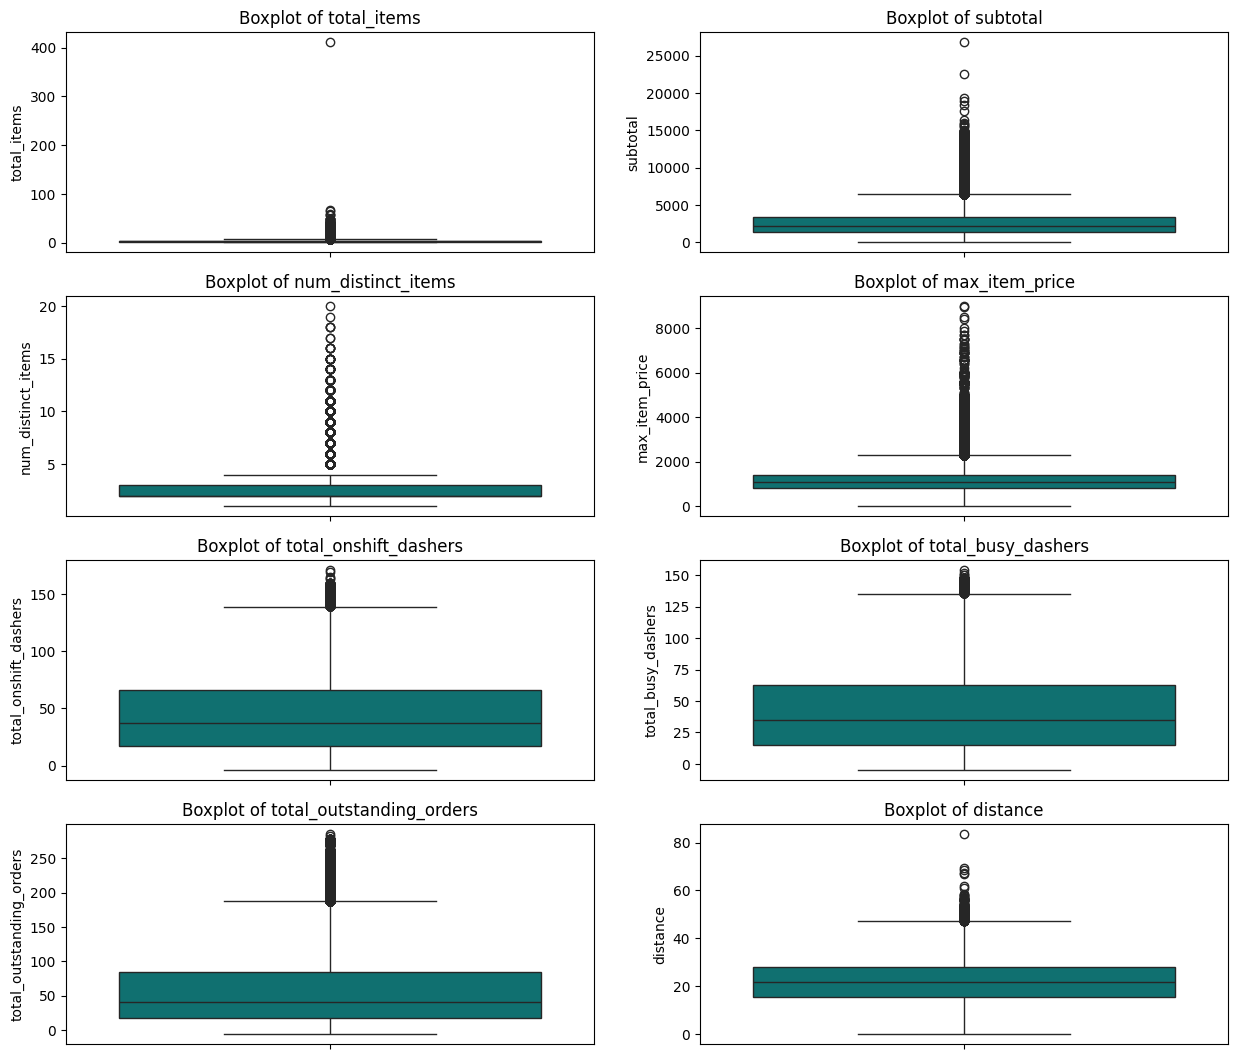

In [29]:
# Set up subplots
plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in numerical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.boxplot(y=X_train_filter[var], color="teal")  # Seaborn plotting function
    plt.title(f"Boxplot of {var}")  # Matplotlib plotting function
    i += 1
plt.show()  # Matplotlib plotting function

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [30]:
# Describing data to check how each attribute is dristributed
X_train_filter.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  140621.000000  140621.000000       140621.000000   140621.000000   
mean        3.208582    2698.872530            2.676464     1159.948656   
std         2.727133    1830.808391            1.626023      559.693980   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1418.000000            2.000000      799.000000   
50%         3.000000    2225.000000            2.000000     1095.000000   
75%         4.000000    3415.000000            3.000000     1395.000000   
max       411.000000   26800.000000           20.000000     8999.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.927948           41.880025                 58.245148   
std                34.572455           32.197755                 52.773640   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance     order_hour     isWeekend  
count  140621.000000  140621.000000  140621.00000  
mean       21.841054       8.475932       0.34546  
std         8.751147       8.677293       0.47552  
min         0.000000       0.000000       0.00000  
25%        15.320000       2.000000       0.00000  
50%        21.760000       3.000000       0.00000  
75%        28.120000      19.000000       1.00000  
max        83.520000      23.000000       1.00000

In [31]:
# Handle outliers
X_train_filter['total_items'].describe()

count    140621.000000
mean          3.208582
std           2.727133
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64

In [32]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_items'])
std_dev = np.std(X_train_filter['total_items'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_total_items'] = (X_train_filter['total_items'] - mean) / std_dev

# Define the threshold
threshold = 3

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_total_items']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_items'].min(), outliers['total_items'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_total_items'], axis=1, inplace=True)

Mean: 3.2085819329972054
Standard Deviation: 2.727123785174612
Outlier Range: 12 411


In [33]:
X_train_filter['total_items'][X_train_filter['total_items']>12].count()/len(X_train_filter['total_items'])*100

0.9642940954764936

In [34]:
y_train.drop(index=X_train_filter[X_train_filter['total_items']>12].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_items']>12].index, inplace=True)

In [35]:
X_train_filter.shape, y_train.shape

((139265, 11), (139265,))

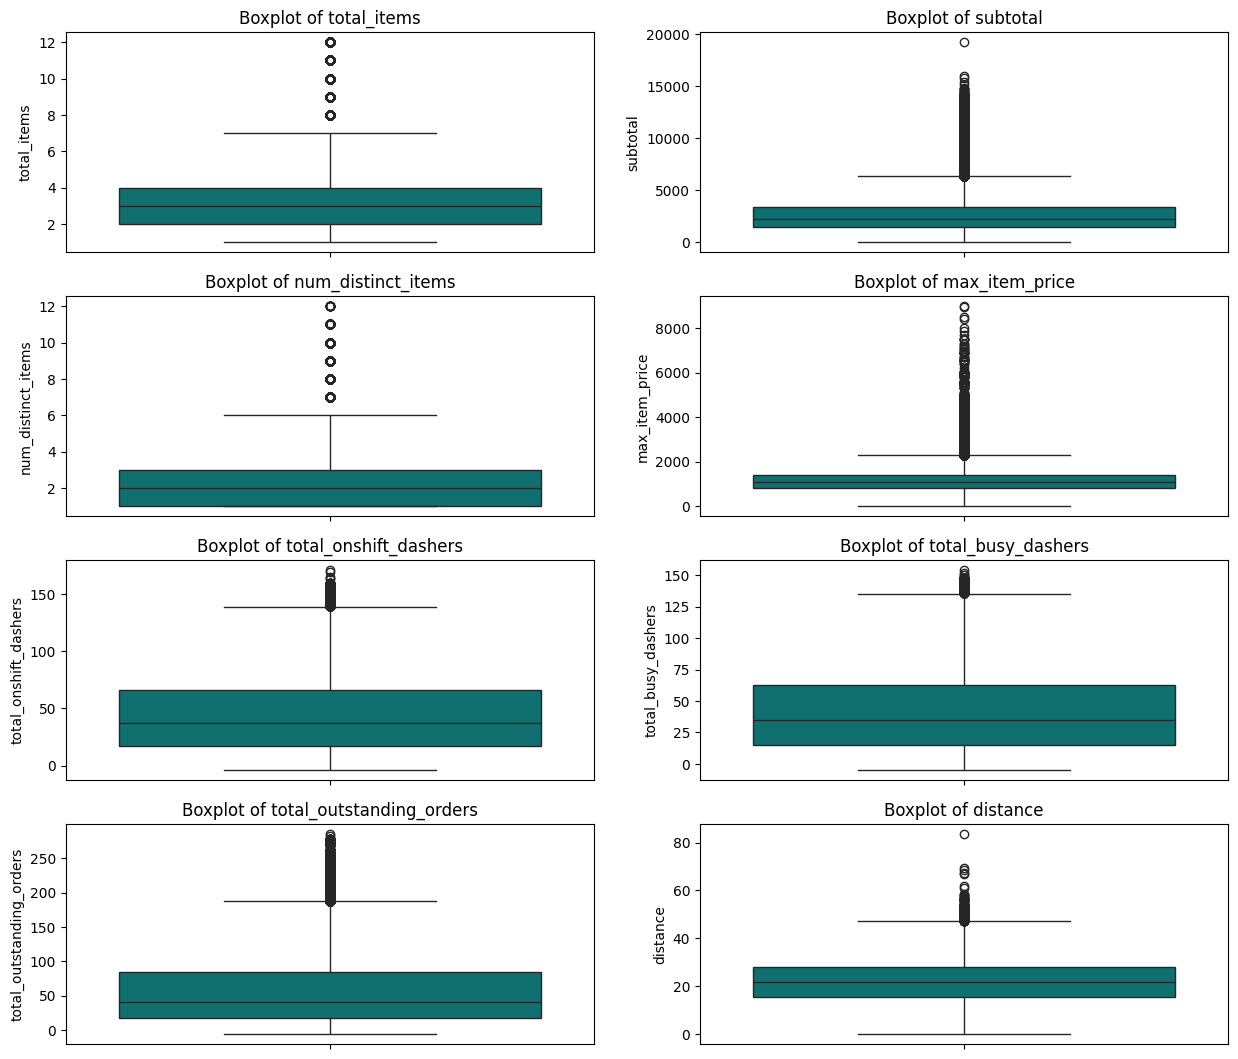

In [36]:
# again we will see box plots for all the features
plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in numerical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.boxplot(y=X_train_filter[var], color="teal")  # Seaborn plotting function
    plt.title(f"Boxplot of {var}")  # Matplotlib plotting function
    i += 1
plt.show()  # Matplotlib plotting function

In [38]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['subtotal'])
std_dev = np.std(X_train_filter['subtotal'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_subtotal'] = (X_train_filter['subtotal'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_subtotal']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['subtotal'].min(), outliers['subtotal'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_subtotal'], axis=1, inplace=True)

Mean: 2666.1114924783687
Standard Deviation: 1757.8399014749928
Outlier Range: 7940 19250


In [39]:
# checking how much of subtotal is of range > 7940
X_train_filter['subtotal'][X_train_filter['subtotal']>7940].count()/len(X_train_filter['subtotal'])*100

1.8037554302947618

In [40]:
y_train.drop(index=X_train_filter[X_train_filter['subtotal']>7940].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['subtotal']>7940].index, inplace=True)

In [41]:
X_train_filter.shape, y_train.shape

((136753, 11), (136753,))

In [43]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['num_distinct_items'])
std_dev = np.std(X_train_filter['num_distinct_items'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_distinct_items'] = (X_train_filter['num_distinct_items'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_distinct_items']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['num_distinct_items'].min(), outliers['num_distinct_items'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_distinct_items'], axis=1, inplace=True)

Mean: 2.56656892353367
Standard Deviation: 1.4437053357663014
Outlier Range: 7 12


In [44]:
X_train_filter['num_distinct_items'][X_train_filter['num_distinct_items']>7].count()/len(X_train_filter['num_distinct_items'])*100

0.5952337425869999

In [45]:
y_train.drop(index=X_train_filter[X_train_filter['num_distinct_items']>7].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['num_distinct_items']>7].index, inplace=True)

In [46]:
X_train_filter.shape, y_train.shape

((135939, 11), (135939,))

In [47]:
#Check for outliers in max_item_price column
#X_train_filter['max_item_price'].describe()

In [48]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['max_item_price'])
std_dev = np.std(X_train_filter['max_item_price'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_max_price'] = (X_train_filter['max_item_price'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_max_price']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['max_item_price'].min(), outliers['max_item_price'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_max_price'], axis=1, inplace=True)

Mean: 1148.8196102663694
Standard Deviation: 537.3423778405296
Outlier Range: 2765 7500


In [49]:
X_train_filter['max_item_price'][X_train_filter['max_item_price']>2765].count()/len(X_train_filter['max_item_price'])*100

1.5654080138885824

In [50]:
y_train.drop(index=X_train_filter[X_train_filter['max_item_price']>2765].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['max_item_price']>2765].index, inplace=True)

In [51]:
X_train_filter.shape, y_train.shape

((133811, 11), (133811,))

In [52]:
#Check for outliers in total_onshift_dashers column
#X_train_filter['total_onshift_dashers'].describe()

In [53]:
X_train_filter[X_train_filter['total_onshift_dashers']<0].count()

order_protocol              19
total_items                 19
subtotal                    19
num_distinct_items          19
max_item_price              19
total_onshift_dashers       19
total_busy_dashers          19
total_outstanding_orders    19
distance                    19
order_hour                  19
isWeekend                   19
dtype: int64

In [54]:
y_train.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']<0].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']<0].index, inplace=True)

In [55]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_onshift_dashers'])
std_dev = np.std(X_train_filter['total_onshift_dashers'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_onshift'] = (X_train_filter['total_onshift_dashers'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_onshift']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_onshift_dashers'].min(), outliers['total_onshift_dashers'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_onshift'], axis=1, inplace=True)

Mean: 44.7990986008132
Standard Deviation: 34.56179633886446
Outlier Range: 149.0 171.0


In [56]:
X_train_filter['total_onshift_dashers'][X_train_filter['total_onshift_dashers']>149].count()/len(X_train_filter['total_onshift_dashers'])*100

0.19956350155465202

In [57]:
y_train.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']>149].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']>149].index, inplace=True)

In [58]:
X_train_filter.shape, y_train.shape

((133525, 11), (133525,))

In [59]:
X_train_filter[X_train_filter['total_busy_dashers']<0].count()

order_protocol              14
total_items                 14
subtotal                    14
num_distinct_items          14
max_item_price              14
total_onshift_dashers       14
total_busy_dashers          14
total_outstanding_orders    14
distance                    14
order_hour                  14
isWeekend                   14
dtype: int64

In [60]:
y_train.drop(index=X_train_filter[X_train_filter['total_busy_dashers']<0].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_busy_dashers']<0].index, inplace=True)

In [61]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_busy_dashers'])
std_dev = np.std(X_train_filter['total_busy_dashers'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_busy'] = (X_train_filter['total_busy_dashers'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_busy']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_busy_dashers'].min(), outliers['total_busy_dashers'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_busy'], axis=1, inplace=True)

Mean: 41.61350750125458
Standard Deviation: 32.02725693129531
Outlier Range: 138.0 154.0


In [62]:
X_train_filter['total_busy_dashers'][X_train_filter['total_busy_dashers']>138].count()/len(X_train_filter['total_busy_dashers'])*100

0.1325733460164331

In [63]:
y_train.drop(index=X_train_filter[X_train_filter['total_busy_dashers']>138].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_busy_dashers']>138].index, inplace=True)

In [64]:
X_train_filter.shape, y_train.shape

((133334, 11), (133334,))

In [65]:
X_train_filter[X_train_filter['total_outstanding_orders']<0].count()

order_protocol              29
total_items                 29
subtotal                    29
num_distinct_items          29
max_item_price              29
total_onshift_dashers       29
total_busy_dashers          29
total_outstanding_orders    29
distance                    29
order_hour                  29
isWeekend                   29
dtype: int64

In [66]:
y_train.drop(index=X_train_filter[X_train_filter['total_outstanding_orders']<0].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_outstanding_orders']<0].index, inplace=True)

In [67]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_outstanding_orders'])
std_dev = np.std(X_train_filter['total_outstanding_orders'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_outstanding'] = (X_train_filter['total_outstanding_orders'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_outstanding']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_outstanding_orders'].min(), outliers['total_outstanding_orders'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_outstanding'], axis=1, inplace=True)

Mean: 57.63726041783879
Standard Deviation: 52.23454121083617
Outlier Range: 215.0 278.0


In [68]:
X_train_filter['total_outstanding_orders'][X_train_filter['total_outstanding_orders']>215].count()/len(X_train_filter['total_outstanding_orders'])*100

0.8004200892689696

In [69]:
# Cap values of total_outstanding_orders at 214
upper_limit = 214
X_train_filter['total_outstanding_orders'] = np.where(X_train_filter['total_outstanding_orders'] > upper_limit,  
                                                      upper_limit,    X_train_filter['total_outstanding_orders'])


In [70]:
print("New range of total_outstanding_orders:", 
      X_train_filter['total_outstanding_orders'].min(), 
      X_train_filter['total_outstanding_orders'].max())

New range of total_outstanding_orders: 0.0 214.0


In [71]:
X_train_filter.shape, y_train.shape

((133305, 11), (133305,))

In [72]:
X_train_filter.shape, y_train.shape

((133305, 11), (133305,))

In [73]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['distance'])
std_dev = np.std(X_train_filter['distance'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_distance'] = (X_train_filter['distance'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_distance']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['distance'].min(), outliers['distance'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_distance'], axis=1, inplace=True)

Mean: 21.825716364727505
Standard Deviation: 8.751478071355425
Outlier Range: 48.12 83.52


In [74]:
X_train_filter['distance'][X_train_filter['distance']>48.12].count()/len(X_train_filter['distance'])*100

0.13052773714414312

In [75]:
y_train.drop(index=X_train_filter[X_train_filter['distance']>48.12].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['distance']>48.12].index, inplace=True)

In [76]:
X_train_filter.shape, y_train.shape

((133131, 11), (133131,))

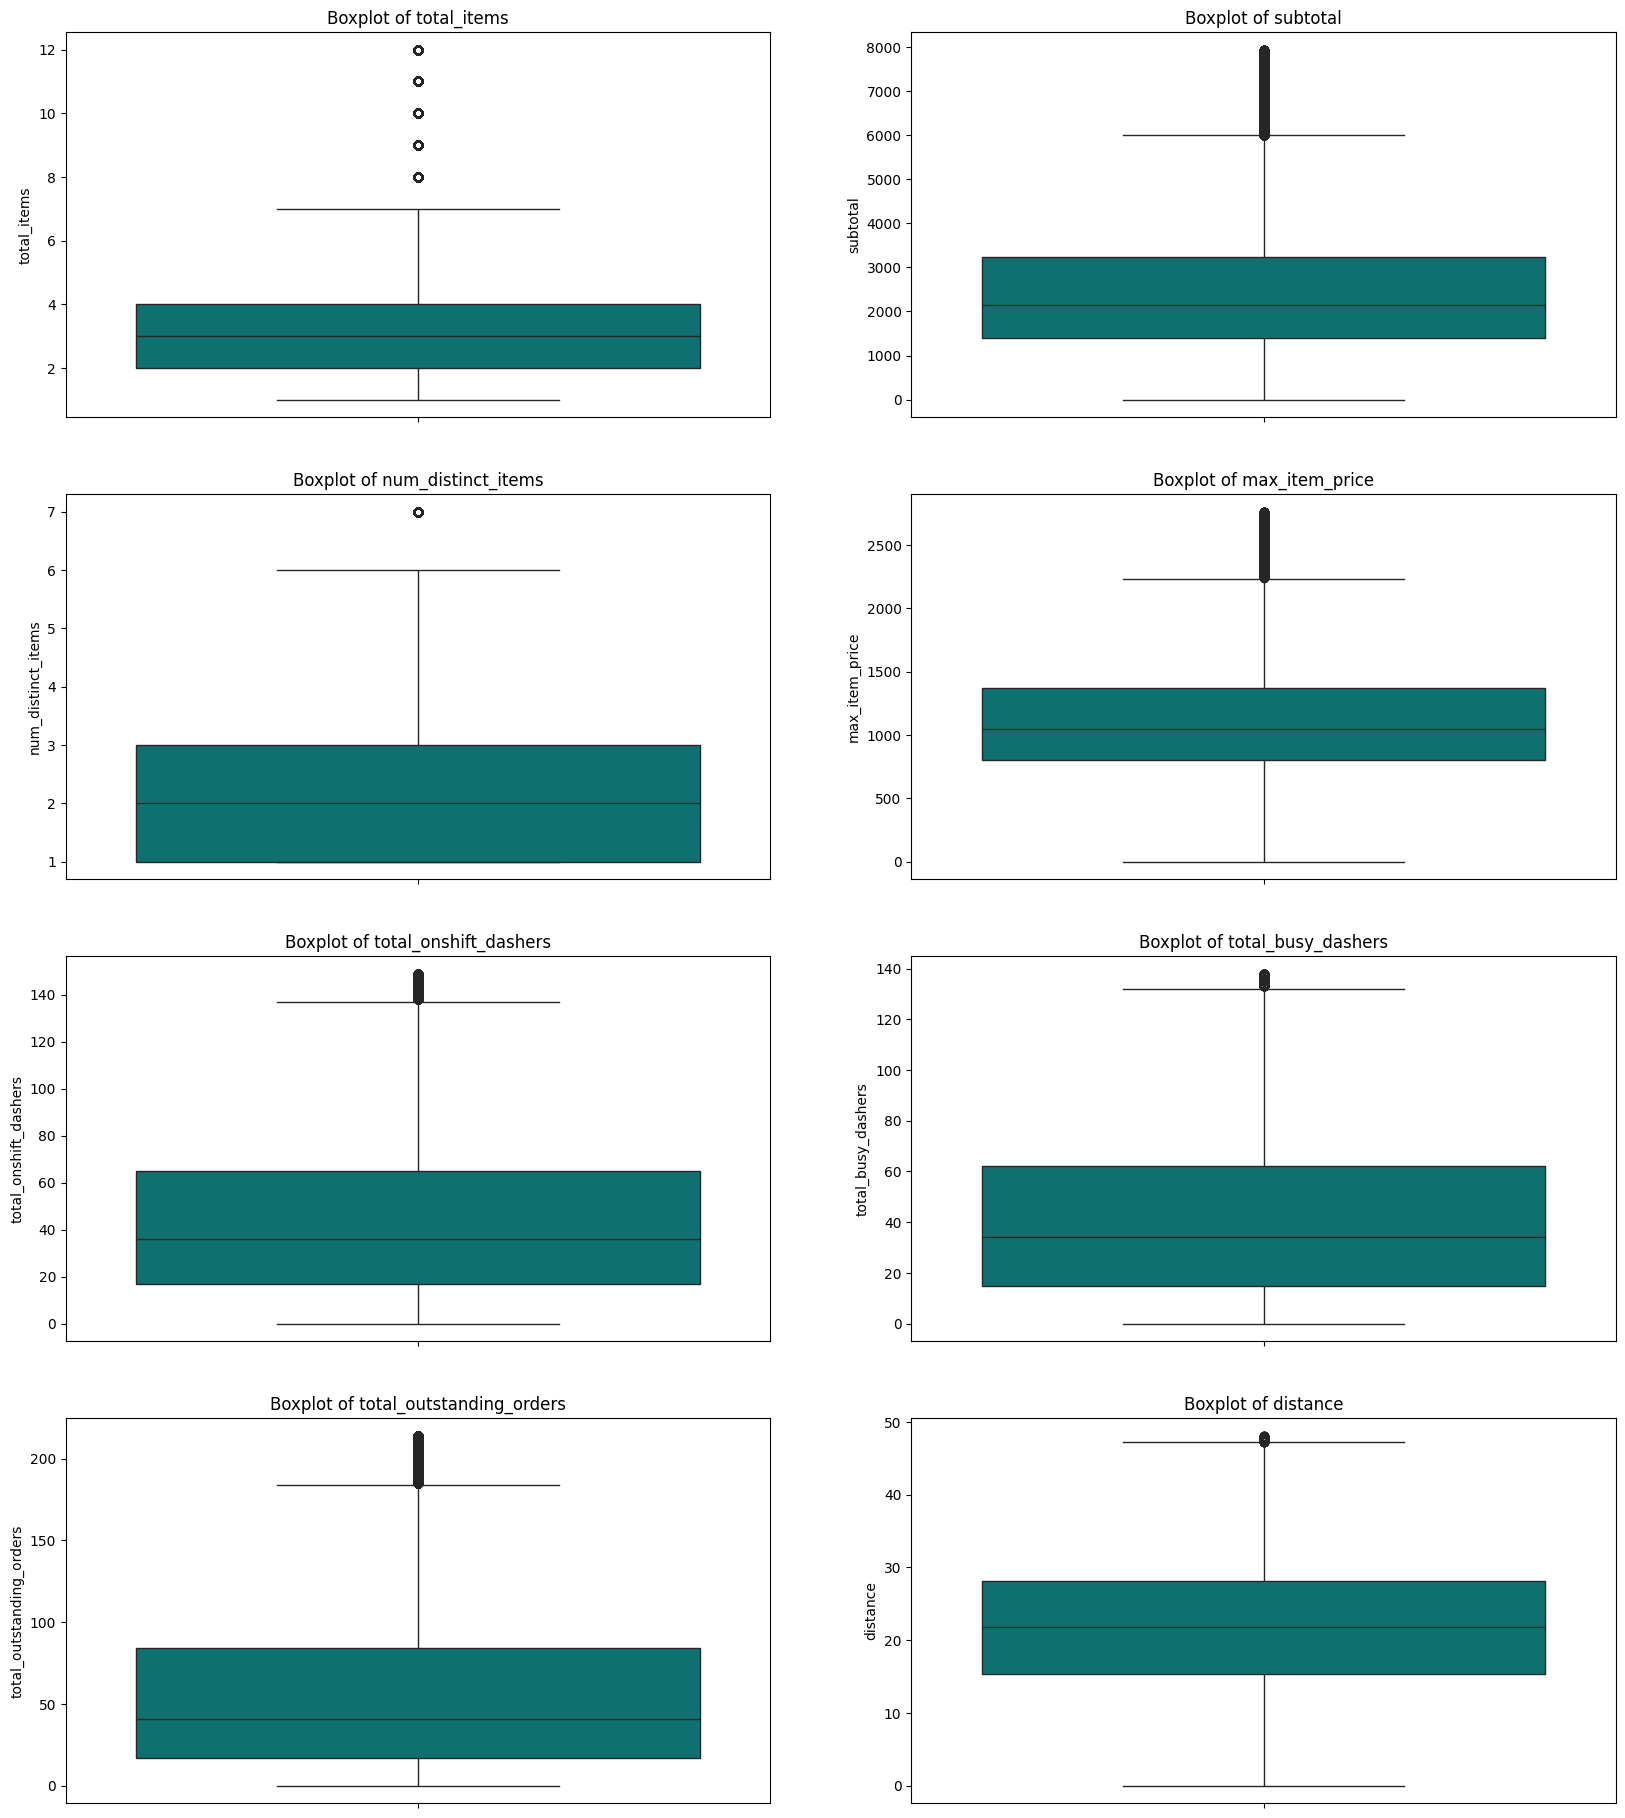

In [77]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))  # Matplotlib plotting function
i = 1
for var in numerical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.boxplot(y=X_train_filter[var], color="teal")  # Seaborn plotting function
    plt.title(f"Boxplot of {var}")  # Matplotlib plotting function
    i += 1
plt.show()  # Matplotlib plotting function

In [78]:
#Check for outliers in delivery_time_minutes column
y_train.describe()

count    133131.000000
mean         45.750922
std           9.070924
min          32.000000
25%          39.000000
50%          44.000000
75%          51.000000
max         105.000000
Name: time_taken_minutes, dtype: float64

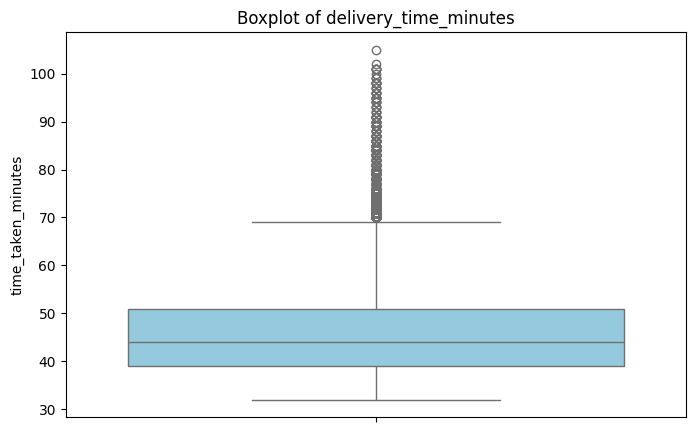

In [79]:
#Now we will plot boxplot for target variable
plt.figure(figsize=(8, 5))  # Matplotlib plotting function
sns.boxplot(y=y_train, color="skyblue")  # Seaborn plotting function
plt.title(f"Boxplot of delivery_time_minutes")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

In [80]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 133131 entries, 102712 to 121958
Series name: time_taken_minutes
Non-Null Count   Dtype  
--------------   -----  
133131 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [81]:
# Removing the outliers based on IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)


Lower Bound:  21.0
Upper Bound:  69.0


In [82]:
# Filtering y_train and corresponding X_train
outlier_fltr = (y_train <= upper_bound)

In [83]:
(len(y_train)-y_train[outlier_fltr].count())/len(y_train)*100

1.1680224741044534

In [84]:
X_train_filtered = X_train_filter[outlier_fltr]
y_train_filtered = y_train[outlier_fltr]

In [85]:
X_train_filtered.shape, y_train_filtered.shape

((131576, 11), (131576,))

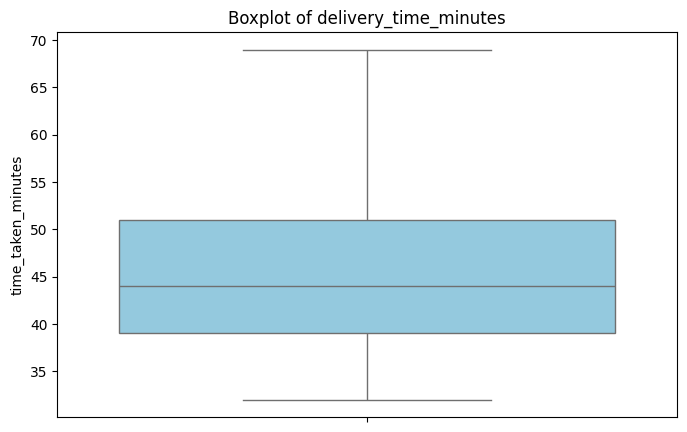

In [86]:
#Now we will plot boxplot for target variable after removing outliers
plt.figure(figsize=(8, 5))  # Matplotlib plotting function
sns.boxplot(y=y_train_filtered, color="skyblue")  # Seaborn plotting function
plt.title(f"Boxplot of delivery_time_minutes")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

In [87]:
#Let's first analyse test data
X_test.shape, y_test.shape

((35156, 14), (35156,))

In [88]:
X_test.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
50609       1.0            1.0            4      2596                   4   
49181       4.0            3.0            3      3180                   2   
4526        5.0            1.0            1      1199                   1   
131         5.0            4.0            5      1590                   4   
57096       3.0            5.0            6      3680                   3   

       min_item_price  max_item_price  total_onshift_dashers  \
50609             299            1099                   55.0   
49181             580            1300                  101.0   
4526             1199            1199                    7.0   
131               200             440                    3.0   
57096             450             750                    9.0   

       total_busy_dashers  total_outstanding_orders  distance  order_hour  \
50609                52.0                      66.0     28.32           2   
49181                98.0                     192.0     23.56           2   
4526                  6.0                       6.0     14.60           5   
131                   4.0                       4.0     25.64          22   
57096                 1.0                       1.0     16.08          19   

       order_day_of_week  isWeekend  
50609                  2          0  
49181                  0          0  
4526                   4          0  
131                    2          0  
57096                  6          1

In [89]:
y_test.head()

50609    50.0
49181    69.0
4526     41.0
131      45.0
57096    40.0
Name: time_taken_minutes, dtype: float64

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [90]:
# Define numerical and categorical columns for easy EDA and data manipulation
test_catergory_cols = ['market_id', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']

test_numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

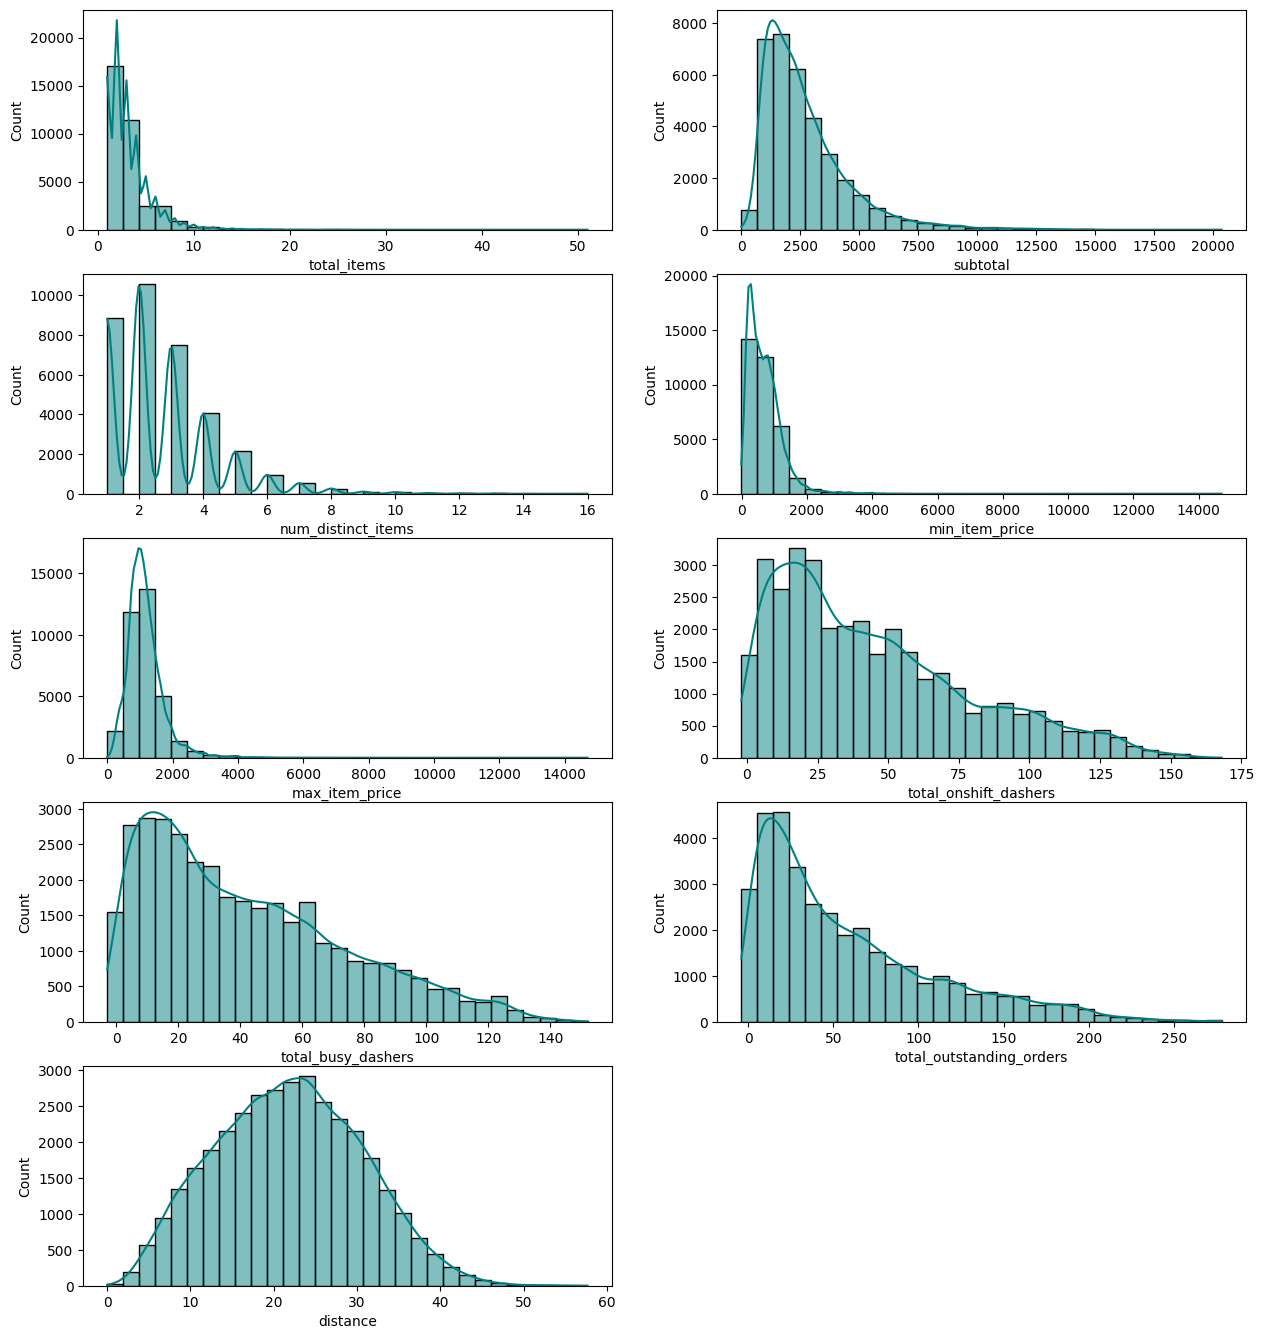

In [91]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in test_numerical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.histplot(X_test[var], bins=30, kde=True, color='teal')  # Seaborn plotting function
    i += 1
plt.show()  # Matplotlib plotting function

##### **4.1.2**
Check the distribution of categorical features

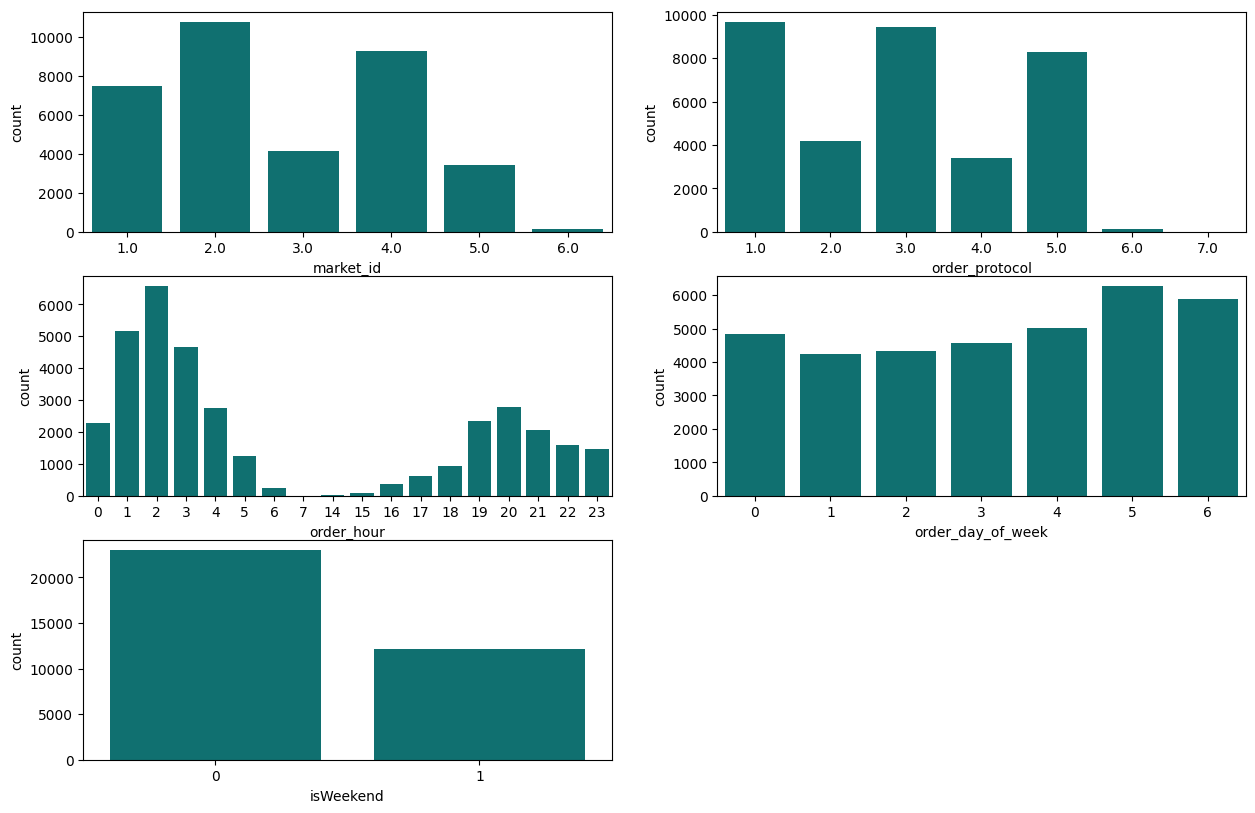

In [92]:
# Distribution of categorical columns
plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in test_catergory_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.countplot(data=X_test, x=var, color ='teal')  # Seaborn plotting function
    i += 1
plt.show()  # Matplotlib plotting function



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='time_taken_minutes', ylabel='Count'>

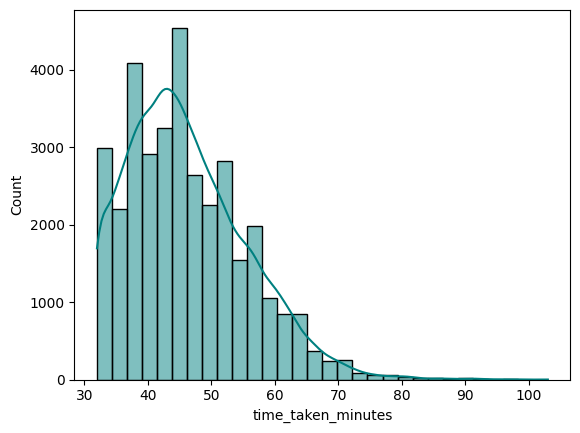

In [93]:
# Distribution of time_taken

sns.histplot(y_test, bins=30, kde=True, color = 'teal')  # Seaborn plotting function

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

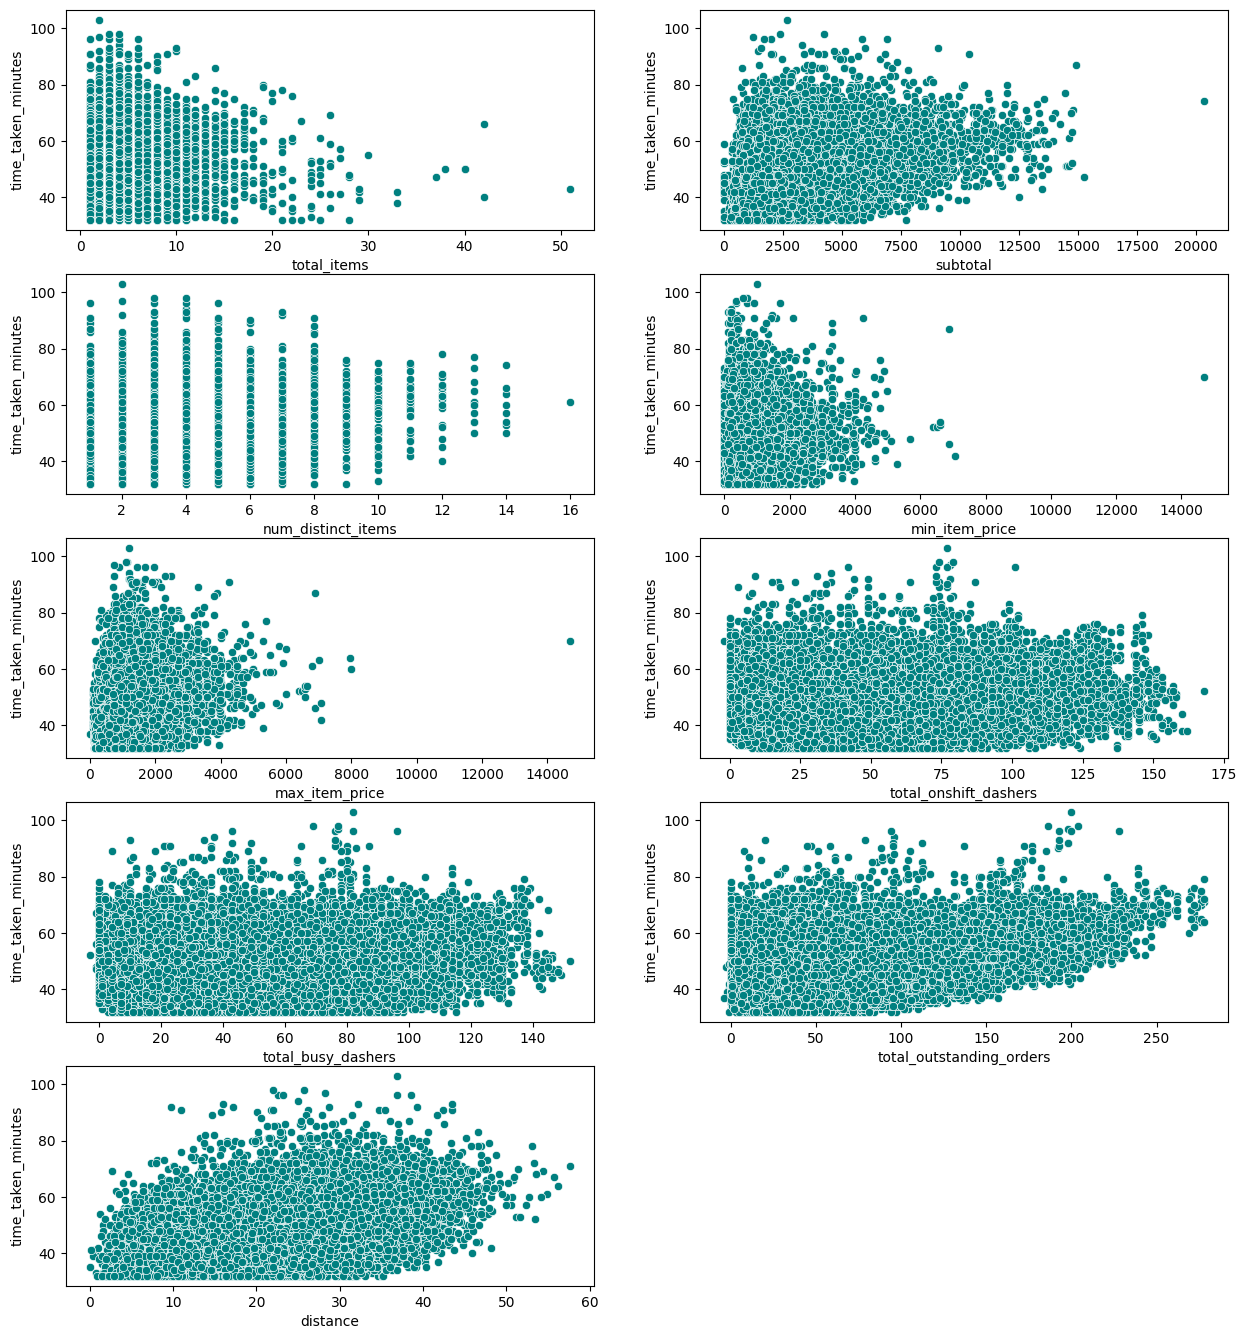

In [94]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(15, 20))  # Matplotlib plotting function
i = 1
for var in test_numerical_cols:
    plt.subplot(6,2,i)  # Matplotlib plotting function
    sns.scatterplot(x=X_test[var], y=y_test, color = 'teal')  # Seaborn plotting function
    i += 1
plt.show()  # Matplotlib plotting function

#### **4.3** Drop the columns with weak correlations with the target variable

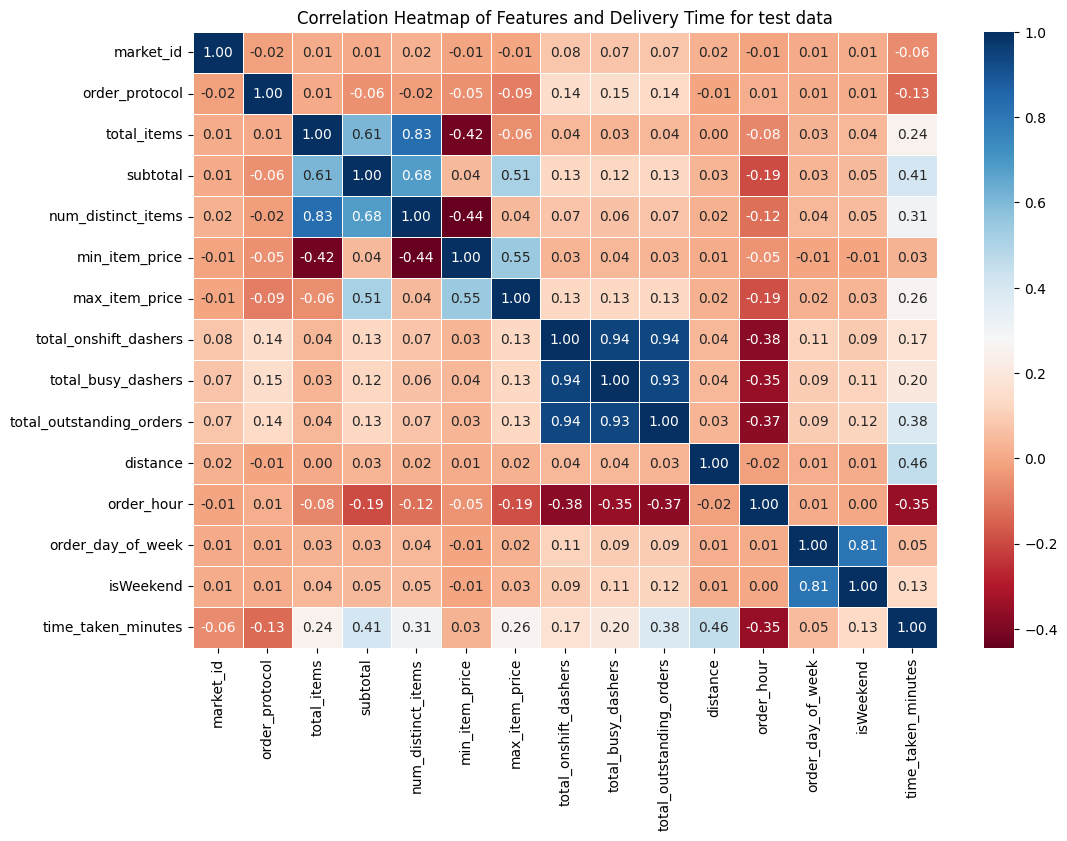

In [95]:
# Drop the weakly correlated columns from training dataset

test_corr = X_test.copy()
test_corr['time_taken_minutes'] = y_test

# Compute correlation matrix
corr_matrix_test = test_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Matplotlib plotting function
sns.heatmap(corr_matrix_test, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)  # Seaborn plotting function

# Set title
plt.title("Correlation Heatmap of Features and Delivery Time for test data")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

In [96]:
# Drop weakly correlated columns from testing dataset
# Set a correlation threshold
threshold = 0.1

# Find features with weak correlation (absolute value < threshold)
weak_features = corr_matrix_test['time_taken_minutes'][abs(corr_matrix_test['time_taken_minutes']) < threshold].index

print(f"Dropping features due to weak correlation: {list(weak_features)}")

# Drop weak features from X_train and X_test
X_test_filter = X_test.drop(columns=weak_features)
X_test_filter.head()

Dropping features due to weak correlation: ['market_id', 'min_item_price', 'order_day_of_week']


order_protocol  total_items  subtotal  num_distinct_items  \
50609            1.0            4      2596                   4   
49181            3.0            3      3180                   2   
4526             1.0            1      1199                   1   
131              4.0            5      1590                   4   
57096            5.0            6      3680                   3   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
50609            1099                   55.0                52.0   
49181            1300                  101.0                98.0   
4526             1199                    7.0                 6.0   
131               440                    3.0                 4.0   
57096             750                    9.0                 1.0   

       total_outstanding_orders  distance  order_hour  isWeekend  
50609                      66.0     28.32           2          0  
49181                     192.0     23.56           2          0  
4526                        6.0     14.60           5          0  
131                         4.0     25.64          22          0  
57096                       1.0     16.08          19          1

In [97]:
X_train_filtered.shape, y_train_filtered.shape, X_test_filter.shape, y_test.shape

((131576, 11), (131576,), (35156, 11), (35156,))

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [98]:
# Import libraries

#data preprocessing
from sklearn.preprocessing import StandardScaler

#model training and validation
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Check for the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Checking RFE
from sklearn.feature_selection import RFE


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [99]:
# Apply scaling to the numerical columns
# Initialize scaler
scaler = StandardScaler()


In [100]:
# Fit & transform numerical columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_filtered), columns = X_train_filtered.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_filter), columns = X_test_filter.columns)

In [101]:
X_train_scaled.head()
X_test_scaled.head()

order_protocol  total_items  subtotal  num_distinct_items  max_item_price  \
0       -1.264751     0.594073  0.087308            1.077141       -0.022747   
1        0.053794     0.034142  0.495740           -0.386796        0.428284   
2       -1.264751    -1.085719 -0.889712           -1.118764        0.201647   
3        0.713066     1.154004 -0.616258            1.077141       -1.501497   
4        1.372338     1.713935  0.845426            0.345173       -0.805878   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0               0.313518            0.338355                  0.181985   
1               1.663352            1.789165                  2.655529   
2              -1.095006           -1.112456                 -0.995893   
3              -1.212383           -1.175534                 -1.035156   
4              -1.036317           -1.270152                 -1.094049   

   distance  order_hour  isWeekend  
0  0.764818   -0.762973  -0.724536  
1  0.214823   -0.762973  -0.724536  
2 -0.820463   -0.419115  -0.724536  
3  0.455157    1.529409  -0.724536  
4 -0.649456    1.185552   1.380193

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [102]:
X_train_scaled.shape, y_train_filtered.shape

((131576, 11), (131576,))

In [103]:
y_train_final = y_train_filtered.reset_index(drop=True)

In [104]:
# Create/Initialise the model
X_train_lm = sm.add_constant(X_train_scaled)

In [105]:
# Train the model using the training data
LR_M1 = sm.OLS(y_train_final, X_train_lm).fit()

In [106]:
LR_M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 8.097e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:32:36   Log-Likelihood:            -3.3353e+05
No. Observations:              131576   AIC:                         6.671e+05
Df Residuals:                  131564   BIC:                         6.672e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.4018      0.008   5394.877      0.000      45.385      45.418
order_protocol              -1.0052      0.009   -116.953      0.000      -1.022      -0.988
total_items                 -0.0748      0.019     -3.963      0.000      -0.112      -0.038
subtotal                     1.8046      0.016    109.430      0.000       1.772       1.837
num_distinct_items           0.6786      0.017     39.150      0.000       0.645       0.713
max_item_price               0.2464      0.013     19.464      0.000       0.222       0.271
total_onshift_dashers      -12.2288      0.030   -414.177      0.000     -12.287     -12.171
total_busy_dashers          -4.4231      0.028   -156.308      0.000      -4.479      -4.368
total_outstanding_orders    17.6884      0.028    640.701      0.000      17.634      17.743
distance                     4.0198      0.008    476.689      0.000       4.003       4.036
order_hour                  -2.0618      0.009   -221.777      0.000      -2.080      -2.044
isWeekend                    0.7209      0.009     84.700      0.000       0.704       0.738
==============================================================================
Omnibus:                    35113.006   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100899.192
Skew:                           1.405   Prob(JB):                         0.00
Kurtosis:                       6.241   Cond. No.                         7.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
X_test_lm = sm.add_constant(X_test_scaled)

In [108]:
# Make predictions
y_test_pred = LR_M1.predict(X_test_lm)


In [109]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.36
Mean Squared Error (MSE): 11.22
Root Mean Squared Error (RMSE): 3.35
R² Score: 0.8719


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [110]:
# Loop through the number of features and test the model
model = LinearRegression()

# Initialize RFE to select the top n-3 features
rfe = RFE(estimator=model, n_features_to_select=(X_train_scaled.shape[1]-3))


In [111]:
rfe.fit_transform(X_train_scaled, y_train_filtered)

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('order_protocol', True, 1),
 ('total_items', False, 4),
 ('subtotal', True, 1),
 ('num_distinct_items', False, 2),
 ('max_item_price', False, 3),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('order_hour', True, 1),
 ('isWeekend', True, 1)]

In [112]:
# Get selected features
selected_features = X_train_scaled.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'order_hour', 'isWeekend'],
      dtype='object')


In [113]:
# Transform data to only keep selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

In [114]:
X_train_lm = sm.add_constant(X_train_selected)

In [115]:
LR_m2 = sm.OLS(y_train_final, X_train_lm).fit()

In [116]:
LR_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.089e+05
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:32:37   Log-Likelihood:            -3.3479e+05
No. Observations:              131576   AIC:                         6.696e+05
Df Residuals:                  131567   BIC:                         6.697e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.4018      0.008   5343.495      0.000      45.385      45.418
order_protocol              -1.0189      0.009   -117.831      0.000      -1.036      -1.002
subtotal                     2.3289      0.009    265.455      0.000       2.312       2.346
total_onshift_dashers      -12.2248      0.030   -410.119      0.000     -12.283     -12.166
total_busy_dashers          -4.4329      0.029   -155.197      0.000      -4.489      -4.377
total_outstanding_orders    17.6887      0.028    634.617      0.000      17.634      17.743
distance                     4.0222      0.009    472.466      0.000       4.006       4.039
order_hour                  -2.0802      0.009   -222.512      0.000      -2.099      -2.062
isWeekend                    0.7331      0.009     85.358      0.000       0.716       0.750
==============================================================================
Omnibus:                    33519.742   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92763.924
Skew:                           1.356   Prob(JB):                         0.00
Kurtosis:                       6.093   Cond. No.                         7.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
X_test_lm = sm.add_constant(X_test_selected)
# Make predictions
y_test_pred = LR_m2.predict(X_test_lm)

In [118]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.40
Mean Squared Error (MSE): 11.46
Root Mean Squared Error (RMSE): 3.38
R² Score: 0.8691


In [119]:
# Checking VIF for selected features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_selected.columns.tolist()
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

print(vif_data)

                    Feature        VIF
0            order_protocol   1.035793
1                  subtotal   1.066151
2     total_onshift_dashers  12.307374
3        total_busy_dashers  11.301018
4  total_outstanding_orders  10.761474
5                  distance   1.003901
6                order_hour   1.210651
7                 isWeekend   1.021684


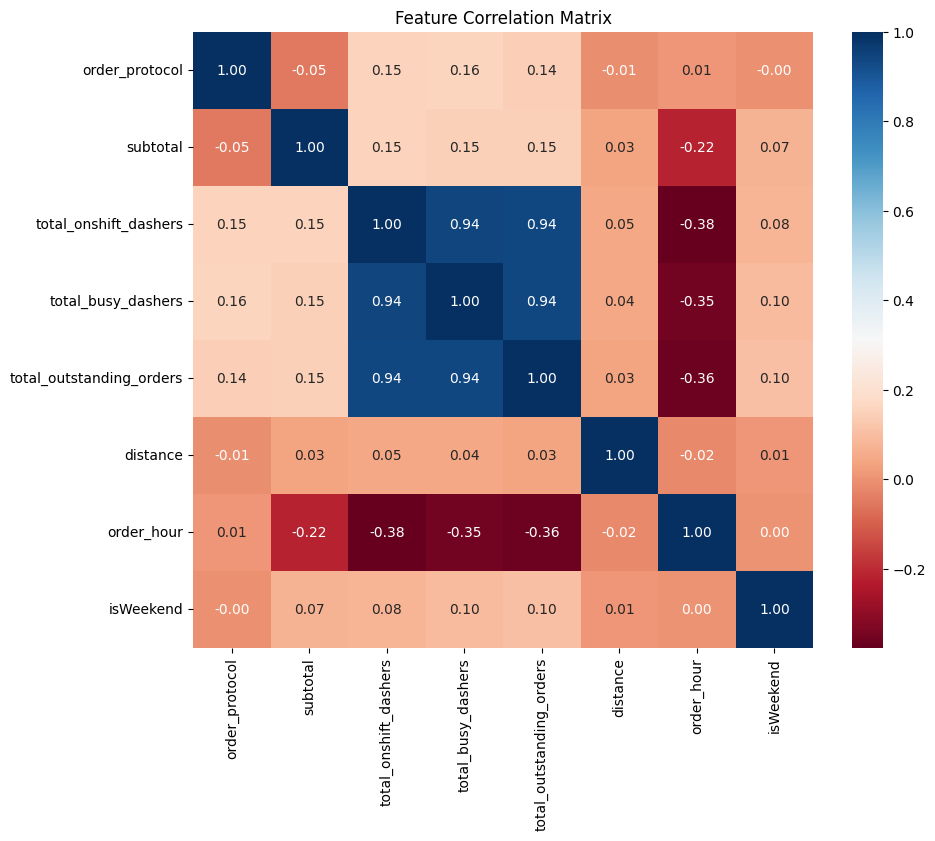

In [120]:
# Calculate correlation matrix
correlation_matrix = X_train_selected.corr()
plt.figure(figsize=(10, 8))  # Matplotlib plotting function
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f")  # Seaborn plotting function
plt.title("Feature Correlation Matrix")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

In [121]:
# Dropped columns 'total_busy_dashers' due to high VIF value
X_train_lm1 = X_train_selected.drop(['total_onshift_dashers'], axis=1)
X_test_lm1 = X_test_selected.drop(['total_onshift_dashers'], axis=1)


In [122]:
X_train_lm1 = sm.add_constant(X_train_lm1)

In [123]:
y_test_pred = LR_m2.predict(X_test_lm)

In [124]:
#Trying Model 3 post VIF
LR_m3 = sm.OLS(y_train_final, X_train_lm1).fit()
LR_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 4.408e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:32:38   Log-Likelihood:            -3.8897e+05
No. Observations:              131576   AIC:                         7.780e+05
Df Residuals:                  131568   BIC:                         7.780e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.4018      0.013   3540.055      0.000      45.377      45.427
order_protocol              -1.1263      0.013    -86.330      0.000      -1.152      -1.101
subtotal                     2.2489      0.013    169.866      0.000       2.223       2.275
total_busy_dashers         -10.6118      0.037   -289.710      0.000     -10.684     -10.540
total_outstanding_orders    12.1238      0.037    329.893      0.000      12.052      12.196
distance                     3.9296      0.013    305.911      0.000       3.904       3.955
order_hour                  -1.6852      0.014   -120.062      0.000      -1.713      -1.658
isWeekend                    0.9584      0.013     74.079      0.000       0.933       0.984
==============================================================================
Omnibus:                     4664.218   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8555.638
Skew:                           0.286   Prob(JB):                         0.00
Kurtosis:                       4.110   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
X_test_lm1 = sm.add_constant(X_test_lm1)
# Make predictions
y_test_pred = LR_m3.predict(X_test_lm1)


In [126]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 3.68
Mean Squared Error (MSE): 24.92
Root Mean Squared Error (RMSE): 4.99
R² Score: 0.7153


In [127]:
# Extract the feature names from the model 
model_features = LR_m3.params.index

# If 'const' or 'Intercept' is in model_features, exclude it for subsetting X_test_scaled
model_features = [f for f in model_features if f not in ['const', 'Intercept']]

# Ensuring X_test_scaled only includes the features used in the model (excluding 'const')
X_test_scaled_chk = X_test_scaled[model_features]

# Extract coefficients and p-values 
feature_names = model_features
coefficients = LR_m3.params[model_features]
p_values = LR_m3.pvalues[model_features]

# Verify lengths match
assert len(feature_names) == len(coefficients) == len(p_values), "Length mismatch between feature names, coefficients, and p-values"

# Creating a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients),
    'P-Value': p_values
})

# Sorting by absolute coefficient to find the top 3 features
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying the top 3 features
print("Top 3 Features Performing Well in LR_m3 (Based on Coefficients):")
print(feature_importance.head(3))


Top 3 Features Performing Well in LR_m3 (Based on Coefficients):
                                           Feature  Coefficient  \
total_outstanding_orders  total_outstanding_orders    12.123751   
total_busy_dashers              total_busy_dashers   -10.611793   
distance                                  distance     3.929628   

                          Absolute Coefficient  P-Value  
total_outstanding_orders             12.123751      0.0  
total_busy_dashers                   10.611793      0.0  
distance                              3.929628      0.0  


In [128]:
# Build the final model with selected number of features

In [129]:
X_train_lm = sm.add_constant(X_train_scaled)

In [130]:
# Train the model using the training data
lrfnl = sm.OLS(y_train_final, X_train_lm).fit()

In [131]:
lrfnl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 8.097e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:32:39   Log-Likelihood:            -3.3353e+05
No. Observations:              131576   AIC:                         6.671e+05
Df Residuals:                  131564   BIC:                         6.672e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.4018      0.008   5394.877      0.000      45.385      45.418
order_protocol              -1.0052      0.009   -116.953      0.000      -1.022      -0.988
total_items                 -0.0748      0.019     -3.963      0.000      -0.112      -0.038
subtotal                     1.8046      0.016    109.430      0.000       1.772       1.837
num_distinct_items           0.6786      0.017     39.150      0.000       0.645       0.713
max_item_price               0.2464      0.013     19.464      0.000       0.222       0.271
total_onshift_dashers      -12.2288      0.030   -414.177      0.000     -12.287     -12.171
total_busy_dashers          -4.4231      0.028   -156.308      0.000      -4.479      -4.368
total_outstanding_orders    17.6884      0.028    640.701      0.000      17.634      17.743
distance                     4.0198      0.008    476.689      0.000       4.003       4.036
order_hour                  -2.0618      0.009   -221.777      0.000      -2.080      -2.044
isWeekend                    0.7209      0.009     84.700      0.000       0.704       0.738
==============================================================================
Omnibus:                    35113.006   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100899.192
Skew:                           1.405   Prob(JB):                         0.00
Kurtosis:                       6.241   Cond. No.                         7.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
X_test_lm = sm.add_constant(X_test_scaled)

In [133]:
# Make predictions
y_test_pred = lrfnl.predict(X_test_lm)

In [134]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.36
Mean Squared Error (MSE): 11.22
Root Mean Squared Error (RMSE): 3.35
R² Score: 0.8719


In [157]:
# Extract the feature names from the model 
model_features = lrfnl.params.index

# If 'const' or 'Intercept' is in model_features, exclude it for subsetting X_test_scaled
model_features = [f for f in model_features if f not in ['const', 'Intercept']]

# Ensuring X_test_scaled only includes the features used in the model (excluding 'const')
X_test_scaled = X_test_scaled[model_features]

# Extract coefficients and p-values 
feature_names = model_features
coefficients = lrfnl.params[model_features]
p_values = lrfnl.pvalues[model_features]

# Verify lengths match
assert len(feature_names) == len(coefficients) == len(p_values), "Length mismatch between feature names, coefficients, and p-values"

# Creating a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients),
    'P-Value': p_values
})

# Sorting by absolute coefficient to find the top 3 features
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying the top 3 features
print("Top 3 Features Performing Well in LR_FNL (Based on Coefficients):")
print(feature_importance.head(3))


Top 3 Features Performing Well in LR_FNL (Based on Coefficients):
                                           Feature  Coefficient  \
total_outstanding_orders  total_outstanding_orders    17.688431   
total_onshift_dashers        total_onshift_dashers   -12.228762   
total_busy_dashers              total_busy_dashers    -4.423135   

                          Absolute Coefficient  P-Value  
total_outstanding_orders             17.688431      0.0  
total_onshift_dashers                12.228762      0.0  
total_busy_dashers                    4.423135      0.0  


In [136]:
df_predicted = X_test_scaled

In [137]:
df_predicted['delivery_time_actual'] = y_test.reset_index(drop=True)

In [138]:
df_predicted['delivery_time_pred'] = y_test_pred

In [139]:
# Checking actual delivery time vs predicted delivery time
df_predicted[['delivery_time_actual','delivery_time_pred']].head()

# The predicted values are very close to actual delivery time. Which means our model is good fit model.</span>

delivery_time_actual  delivery_time_pred
0                  50.0           49.525336
1                  69.0           66.714874
2                  41.0           42.178405
3                  45.0           43.716815
4                  40.0           40.334295

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [140]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_test_pred

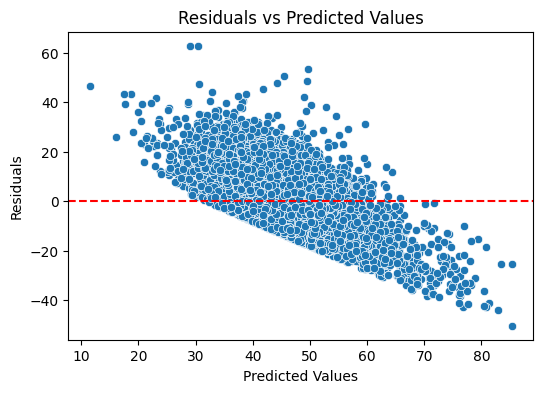

In [141]:
#residuals vs predicted values
plt.figure(figsize=(6,4))  # Matplotlib plotting function
sns.scatterplot(x=y_test_pred, y=residuals)  # Seaborn plotting function
plt.axhline(y=0, color='red', linestyle='--')  # Matplotlib plotting function
plt.xlabel("Predicted Values")  # Matplotlib plotting function
plt.ylabel("Residuals")  # Matplotlib plotting function
plt.title("Residuals vs Predicted Values")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

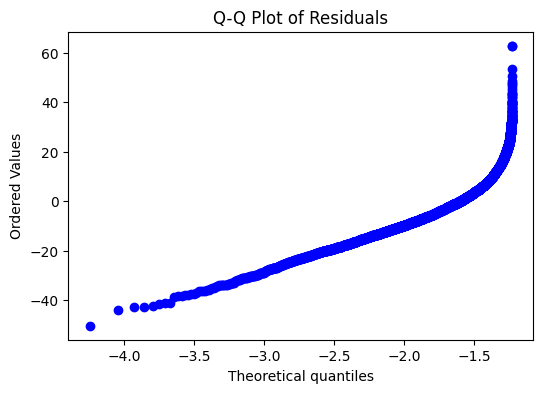

In [142]:
import scipy.stats as stats

#Q-Q plot for Normality Check
plt.figure(figsize=(6,4))  # Matplotlib plotting function
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

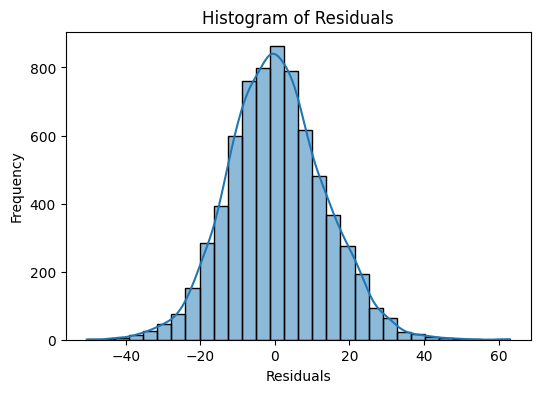

In [143]:
# Residual Histogram
plt.figure(figsize=(6,4))  # Matplotlib plotting function
sns.histplot(residuals, bins=30, kde=True)  # Seaborn plotting function
plt.xlabel("Residuals")  # Matplotlib plotting function
plt.ylabel("Frequency")  # Matplotlib plotting function
plt.title("Histogram of Residuals")  # Matplotlib plotting function
plt.show()  # Matplotlib plotting function

[Your inferences here:]



Residuals vs. Predicted Values
>     Residuals are randomly scattered around zero with no clear pattern which is considered to be good model.
 Near-Normal Residual Distribution:
>  Residuals are approximately normal, as the Q-Q plot follows the 45-degree line
for most quantiles, and the histogram is bell-shaped, supporting the normality assumption of linear regression.
Centered Residuals:
>  Residuals are centered around 0, with the histogram peaking near 0, suggesting no systematic bias and that the model captures the overall trend well.
> Histogram of Residuals
     Residuals are following a normal (bell-shaped) distribution as exepcted


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [144]:
# Compare the scaled vs unscaled features used in the final model

In [145]:
# Get model coefficients
coefficients = LR_M1.params

In [146]:
coef_df = coefficients.reset_index(name = 'scaled_coef')

In [147]:
X_train_final = X_train_filtered.reset_index(drop=True)

In [148]:
# Create/Initialise the model with unscaled data
X_train_lm = sm.add_constant(X_train_final)

In [149]:
# Train the model using the unsclaed training data
lr_unscale = sm.OLS(y_train_final, X_train_lm).fit()
lr_unscale.params

const                       35.875907
order_protocol              -0.662728
total_items                 -0.041881
subtotal                     0.001262
num_distinct_items           0.496710
max_item_price               0.000553
total_onshift_dashers       -0.358844
total_busy_dashers          -0.139503
total_outstanding_orders     0.347247
distance                     0.464464
order_hour                  -0.236316
isWeekend                    1.517210
dtype: float64

In [150]:
coef_df['Unscaled Coefficient'] = lr_unscale.params.values

In [151]:
coef_df

index  scaled_coef  Unscaled Coefficient
0                      const    45.401829             35.875907
1             order_protocol    -1.005241             -0.662728
2                total_items    -0.074797             -0.041881
3                   subtotal     1.804628              0.001262
4         num_distinct_items     0.678595              0.496710
5             max_item_price     0.246419              0.000553
6      total_onshift_dashers   -12.228762             -0.358844
7         total_busy_dashers    -4.423135             -0.139503
8   total_outstanding_orders    17.688431              0.347247
9                   distance     4.019758              0.464464
10                order_hour    -2.061753             -0.236316
11                 isWeekend     0.720858              1.517210

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [152]:
# Analyze the effect of a unit change in a feature, say 'total_items'

In [153]:
unscaled_coef_total_items = coef_df[coef_df['index']=='total_items']['Unscaled Coefficient'].values[0]
scaled_coef_total_items = coef_df[coef_df['index']=='total_items']['scaled_coef'].values[0]

In [154]:
# Standard deviation of 'total_items' from training data
std_total_items = X_train_filtered['total_items'].std()

In [155]:
# Effect of a unit change in 'total_items' using unscaled coefficient
effect_unscaled = unscaled_coef_total_items * 1  # Since we are changing by 1 unit

# Effect of a unit change in 'total_items' using scaled coefficient
effect_scaled = scaled_coef_total_items * std_total_items 

# Display results
print(f"Effect of a unit change in a feature (Unscaled Coefficient): {effect_unscaled:.4f} minutes")
print(f"Effect of a unit change in a feature (Scaled Coefficient): {effect_scaled:.4f} minutes")

Effect of a unit change in a feature (Unscaled Coefficient): -0.0419 minutes
Effect of a unit change in a feature (Scaled Coefficient): -0.1336 minutes


In [156]:
# Effect of a 3-unit change in 'total_items' using the unscaled coefficient
effect_unscaled_3 = unscaled_coef_total_items * 3  

# Effect of a 3-unit change in 'total_items' using the scaled coefficient
effect_scaled_3 = scaled_coef_total_items * std_total_items * 3  

# Display the results
print(f"Effect of unit 'total_items' by 3 (Unscaled): {effect_unscaled_3:.4f} minutes")
print(f"Effect of unit 'total_items' by 3 (Scaled): {effect_scaled_3:.4f} minutes")


Effect of unit 'total_items' by 3 (Unscaled): -0.1256 minutes
Effect of unit 'total_items' by 3 (Scaled): -0.4007 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes, there are categorical variables in the dataset.
From the dataset exploration and preprocessing steps in the notebook, the following categorical columns were found:

store_primary_category
market_id
order_protocol
isWeekend



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
The test_size = 0.2 refers to the proportion of the dataset that will be allocated to the test set when splitting the data into training and test sets. In this case, it means that 20% of the data will be used for testing the model, while the remaining 80% will be used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Looking at the heatmap, variable distance has the highest (i.e. 0.46) positive correlation with target variable delivery_time_minutes. This means that with increase in distance the delivery time also increases.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Approach to Detect Outliers:

>Visual Inspection:
Used boxplots to visualize numerical features (e.g., distance, subtotal, min_item_price). Outliers appeared as points beyond whiskers (( Q1 - 1.5 \times IQR ), ( Q3 + 1.5 \times IQR )).

>IQR Method (Statistical Approach)
Calculated IQR (( Q3 - Q1 )) and flagged values below ( Q1 - 1.5 \times IQR ) or above ( Q3 + 1.5 \times IQR ) as outliers.
Example: Identified outliers in subtotal and total_onshift_dashers (e.g., negative values).

>Removal of Extreme Outliers
Dropped rows with invalid outliers (e.g., min_item_price < 0, total_onshift_dashers < 0), as they were <2% of data and likely errors.
Capped values at Maximum: Cappted the total_outstanding_orders at maximum

>Capping Outliers:
Capped extreme but valid values (e.g., high distance) at IQR thresholds to reduce their impact on the regression model.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>total_outstanding_orders  
total_onshift_dashers        
total_busy_dashers   



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression, a supervised learning technique, predicts a continuous target variable using one or more independent variables (features), aiming to find the best-fit line that reduces the error between actual and predicted values.
It is categorized into two types:
	1. Simple Linear Regression: 
		○ Involves one dependent variable predicted by one independent variable.
		○ The relationship is expressed as:
		○ Y=mX+c Y = mX + c Y=mX+c
	2. Multiple Linear Regression: 
		○ Involves one dependent variable predicted by several independent variables.
		○ The relationship is modeled as:
		○ Y=b0+b1X1+b2X2+…+bnXn Y 
How Linear Regression Works:
	1. Step 1: Identifying Variable Relationships 
		○ Assumes a linear relationship between the dependent variable Y and independent variables X, fitting a straight line to capture this trend.
	2. Cost Function (Error Calculation) 
		○ Errors are computed by comparing predicted and actual values, typically using Mean Squared Error (MSE) as the error metric.
	3. Optimization (Achieving the Best Fit) 
		○ Aims to minimize MSE by determining optimal coefficients, using methods like Gradient Descent or Ordinary Least Squares (OLS).
	4. Model Assessment 
		○ Performance is evaluated with metrics such as:
		○ Mean Absolute Error (MAE): Average of absolute differences.
		○ Mean Squared Error (MSE): Emphasizes larger errors.
		○ Root Mean Squared Error (RMSE): Interpretable error measure.
		○ R² Score: Indicates the variance explained by the model.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression involves one independent variable to predict a continuous dependent variable, using the equation Y=mX+c Y = mX + c Y=mX+c, where m is the slope and c is the intercept, capturing a single linear relationship. Multiple Linear Regression, however, uses multiple independent variables to predict the dependent variable, with the equation Y=b0+b1X1+b2X2+…+bnXn allowing it to model more complex relationships by considering the combined effect of several features.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression, typically the Mean Squared Error, measures the average squared difference between predicted and actual values, quantifying the model's error. It is minimized by adjusting the model's coefficients using methods like Ordinary Least Squares, which finds the optimal values analytically, or Gradient Descent, which iteratively updates coefficients to reduce the error until the best-fit line is achieved.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns the training data too well, capturing noise and specific patterns, leading to poor performance on new data due to excessive complexity. Underfitting happens when a model is too simple to capture the underlying patterns in the data, resulting in high errors on both training and test sets, as it fails to learn the relationships effectively.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help diagnose a linear regression model by showing the difference between actual and predicted values (residuals) against predicted values or features. If residuals are randomly scattered around zero with no clear pattern, the model fits well; however, patterns like curves or trends indicate issues like non-linearity or heteroscedasticity, suggesting the model needs adjustments.